 #### <p style="background-color: #EDE7F6;color:#6600ff;display: inline-block;padding:.6rem;border-radius:.5rem">Import libraries</p>

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import random
from IPython.display import display, HTML
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.feature_selection import mutual_info_classif
import warnings

 #### <p style="background-color: #EDE7F6;color:#6600ff;display: inline-block;padding:.6rem;border-radius:.5rem">Settings</p>

In [2]:
pd.options.display.max_rows = 100
pd.options.display.max_columns = 100
pd.options.display.max_colwidth = 1000
# pd.options.display.precision = 5
warnings.filterwarnings('ignore')

 #### <p style="background-color: #EDE7F6;color:#6600ff;display: inline-block;padding:.6rem;border-radius:.5rem">Import data files</p>

In [3]:
# train = pd.read_csv('train.csv', index_col='Id')
# test = pd.read_csv('test.csv', index_col='Id')
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [4]:
train = train.sample(460)

## <p style="background-color: #EDE7F6; color: #6600ff;margin:0; display:inline-block;padding:.6rem;border-radius:.25rem;">I.DATA PREPARATION</p>

In [5]:
train.head(3)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
961  962          60       RL          NaN    12227   Pave   NaN      IR1   
544  545          60       RL         58.0    17104   Pave   NaN      IR1   
279  280          60       RL         83.0    10005   Pave   NaN      Reg   

    LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
961         Lvl    AllPub    Corner       Gtl       NWAmes       PosN   
544         Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
279         Lvl    AllPub    Inside       Gtl      ClearCr       Norm   

    Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
961       Norm     1Fam     2Story            6            7       1977   
544       Norm     1Fam     2Story            7            5       2006   
279       Norm     1Fam     2Story            7            5       1977   

     YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
961          1995     Gable  CompShg     HdBoard     HdBoard    BrkFace   
544          2006     Gable  CompShg     VinylSd     VinylSd        NaN   
279          1977       Hip  CompShg     Plywood     Plywood    BrkFace   

     MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
961       424.0        TA        Gd     CBlock       Gd       Gd           No   
544         0.0        Gd        TA      PConc       Gd       Gd           Av   
279       299.0        TA        TA     CBlock       Gd       TA           No   

    BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
961          ALQ         896          Unf           0        434         1330   
544          GLQ         554          Unf           0        100          654   
279          BLQ         392          Unf           0        768         1160   

    Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
961    GasA        TA          Y      SBrkr      1542      1330             0   
544    GasA        Ex          Y      SBrkr       664       832             0   
279    GasA        Ex          Y      SBrkr      1156       866             0   

     GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
961       2872             1             0         2         1             4   
544       1496             1             0         2         1             3   
279       2022             0             0         2         1             4   

     KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces  \
961             1          TA            11        Typ           1   
544             1          Gd             7        Typ           1   
279             1          TA             8        Typ           1   

    FireplaceQu GarageType  GarageYrBlt GarageFinish  GarageCars  GarageArea  \
961          TA     Attchd       1977.0          Fin           2         619   
544          Gd     Attchd       2006.0          RFn           2         426   
279          TA     Attchd       1977.0          Fin           2         505   

    GarageQual GarageCond PavedDrive  WoodDeckSF  OpenPorchSF  EnclosedPorch  \
961         TA         TA          Y         550          282              0   
544         TA         TA          Y         100           24              0   
279         TA         TA          Y         288          117              0   

     3SsnPorch  ScreenPorch  PoolArea PoolQC Fence MiscFeature  MiscVal  \
961          0            0         0    NaN   NaN         NaN        0   
544          0            0         0    NaN   NaN         NaN        0   
279          0            0         0    NaN   NaN         NaN        0   

     MoSold  YrSold SaleType SaleCondition  SalePrice  
961       7    2008       WD        Normal     272000  
544       9    2006      New       Partial     179665  
279       3    2008       WD        Normal     192000

In [14]:
train.shape

(460, 81)

In [15]:
print(f'{train.memory_usage().sum()/(1000000)} MB')

0.30176 MB


In [16]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 460 entries, 607 to 975
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             460 non-null    int64  
 1   MSSubClass     460 non-null    int64  
 2   MSZoning       460 non-null    object 
 3   LotFrontage    371 non-null    float64
 4   LotArea        460 non-null    int64  
 5   Street         460 non-null    object 
 6   Alley          30 non-null     object 
 7   LotShape       460 non-null    object 
 8   LandContour    460 non-null    object 
 9   Utilities      460 non-null    object 
 10  LotConfig      460 non-null    object 
 11  LandSlope      460 non-null    object 
 12  Neighborhood   460 non-null    object 
 13  Condition1     460 non-null    object 
 14  Condition2     460 non-null    object 
 15  BldgType       460 non-null    object 
 16  HouseStyle     460 non-null    object 
 17  OverallQual    460 non-null    int64  
 18  OverallCond  

In [17]:
train.describe()

Id  MSSubClass  LotFrontage       LotArea  OverallQual  \
count   460.000000  460.000000   371.000000    460.000000   460.000000   
mean    728.717391   55.750000    69.679245  10025.839130     5.986957   
std     421.336170   41.769579    21.849536   5121.175956     1.328358   
min       1.000000   20.000000    21.000000   1680.000000     2.000000   
25%     345.500000   20.000000    59.500000   7694.250000     5.000000   
50%     750.500000   50.000000    70.000000   9407.000000     6.000000   
75%    1080.250000   70.000000    80.000000  11451.250000     7.000000   
max    1460.000000  190.000000   174.000000  57200.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd  MasVnrArea   BsmtFinSF1  \
count   460.000000   460.000000    460.000000  458.000000   460.000000   
mean      5.558696  1969.689130   1984.286957   95.984716   449.636957   
std       1.059674    30.349042     20.602267  160.048494   421.872913   
min       2.000000  1880.000000   1950.000000    0.000000     0.000000   
25%       5.000000  1953.750000   1965.000000    0.000000     0.000000   
50%       5.000000  1971.000000   1993.000000    0.000000   414.500000   
75%       6.000000  1999.000000   2003.000000  153.750000   720.250000   
max       9.000000  2009.000000   2010.000000  922.000000  2260.000000   

        BsmtFinSF2    BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  \
count   460.000000   460.000000   460.000000   460.000000   460.000000   
mean     55.602174   537.371739  1042.610870  1147.252174   348.345652   
std     175.142271   421.709627   390.288976   345.681855   432.112201   
min       0.000000     0.000000     0.000000   480.000000     0.000000   
25%       0.000000   211.500000   801.500000   887.000000     0.000000   
50%       0.000000   447.000000   998.500000  1090.500000     0.000000   
75%       0.000000   792.500000  1285.750000  1360.250000   729.000000   
max    1127.000000  2336.000000  3138.000000  3138.000000  1538.000000   

       LowQualFinSF    GrLivArea  BsmtFullBath  BsmtHalfBath    FullBath  \
count    460.000000   460.000000    460.000000    460.000000  460.000000   
mean       5.791304  1501.389130      0.447826      0.060870    1.517391   
std       49.107857   485.949811      0.515020      0.248287    0.546051   
min        0.000000   480.000000      0.000000      0.000000    0.000000   
25%        0.000000  1151.000000      0.000000      0.000000    1.000000   
50%        0.000000  1442.000000      0.000000      0.000000    2.000000   
75%        0.000000  1744.750000      1.000000      0.000000    2.000000   
max      528.000000  4676.000000      2.000000      2.000000    3.000000   

         HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  \
count  460.000000    460.000000    460.000000    460.000000  460.000000   
mean     0.389130      2.847826      1.043478      6.493478    0.595652   
std      0.514169      0.799439      0.204153      1.520363    0.644723   
min      0.000000      0.000000      1.000000      3.000000    0.000000   
25%      0.000000      2.000000      1.000000      5.750000    0.000000   
50%      0.000000      3.000000      1.000000      6.000000    1.000000   
75%      1.000000      3.000000      1.000000      7.000000    1.000000   
max      2.000000      6.000000      2.000000     12.000000    3.000000   

       GarageYrBlt  GarageCars   GarageArea  WoodDeckSF  OpenPorchSF  \
count   437.000000  460.000000   460.000000  460.000000   460.000000   
mean   1977.286041    1.758696   473.189130   93.891304    42.417391   
std      24.135951    0.723426   206.906863  127.767444    67.942496   
min    1910.000000    0.000000     0.000000    0.000000     0.000000   
25%    1959.000000    1.000000   321.250000    0.000000     0.000000   
50%    1977.000000    2.000000   480.000000    0.000000    16.000000   
75%    2000.000000    2.000000   576.000000  165.000000    63.000000   
max    2010.000000    4.000000  1220.000000  736.000000   547.000000   

     

In [21]:
# Function to style tables
def style_table(df):
    styled_df = df.style.set_table_styles([
        {"selector": "th", "props": [("color", "white"), ("background-color", "#14adc6")]}
    ]).set_properties(**{"text-align": "center"}).hide(axis="index")
    return styled_df.to_html()

# Function to generate random shades of color
def generate_random_color():
    color = "#{:02x}{:02x}{:02x}".format(
        random.randint(150, 255),
        random.randint(150, 255)
    )
    return color

# Function to create styled heading with emojis
def styled_heading(text, background_color='#14adc6', text_color='white'):
    return f"""
    <div style="
        text-align: center;
        background: {background_color};
        color: {text_color};
        padding: 15px;
        font-size: 30px;
        font-weight: bold;
        line-height: 1;
        border-radius: 20px 20px 0 0;
        margin-bottom: 20px;
        box-shadow: 0px 4px 6px rgba(0, 0, 0, 0.2);
        border: 3px dashed {background_color};
    ">
        {text}
    </div>
    """

def print_dataset_analysis(dataset, dataset_name, n_top=5, heading_color='#14adc6', text_color='white'):
    heading = styled_heading(f"🔍 {dataset_name} Overview", heading_color, text_color)
    display(HTML(heading))
    
    display(HTML("<h2 style='font-size: 24px;'>Shape of the Dataset</h2>"))
    display(HTML(f"<p>{dataset.shape[0]} rows and {dataset.shape[1]} columns</p>"))
    
    display(HTML("<h2 style='font-size: 24px;'>First 5 Rows</h2>"))
    display(HTML(style_table(dataset.head(n_top))))
    
    display(HTML("<h2 style='font-size: 24px;'>Summary Statistics</h2>"))
    display(HTML(style_table(dataset.describe())))
    
    display(HTML("<h2 style='font-size: 24px;'>Null Values</h2>"))
    null_counts = dataset.isnull().sum()
    if null_counts.sum() == 0:
        display(HTML("<p>No null values found.</p>"))
    else:
        display(HTML(style_table(null_counts[null_counts > 0].to_frame(name='Null Values'))))
    
    display(HTML("<h2 style='font-size: 24px;'>Duplicate Rows</h2>"))
    duplicate_count = dataset.duplicated().sum()
    display(HTML(f"<p>{duplicate_count} duplicate rows found.</p>"))
    
    display(HTML("<h2 style='font-size: 24px;'>Data Types</h2>"))
    dtypes_table = pd.DataFrame({
        'Data Type': [dataset[col].dtype for col in dataset.columns],
        'Column Name': dataset.columns
    })
    display(HTML(style_table(dtypes_table)))

    display(HTML("<h2 style='font-size: 24px;'>Column Names</h2>"))
    display(HTML(f"<p>{', '.join(dataset.columns)}</p>"))

    display(HTML("<h2 style='font-size: 24px;'>Unique Values</h2>"))
    unique_values_table = pd.DataFrame({
        'Data Type': [dataset[col].dtype for col in dataset.columns],
        'Column Name': dataset.columns,
        'Unique Values': [', '.join(map(str, dataset[col].unique()[:7])) for col in dataset.columns]
    })
    display(HTML(style_table(unique_values_table)))



print_dataset_analysis(train, "Training Data")
# print_dataset_analysis(test, "Test Data", heading_color='#ffd700')


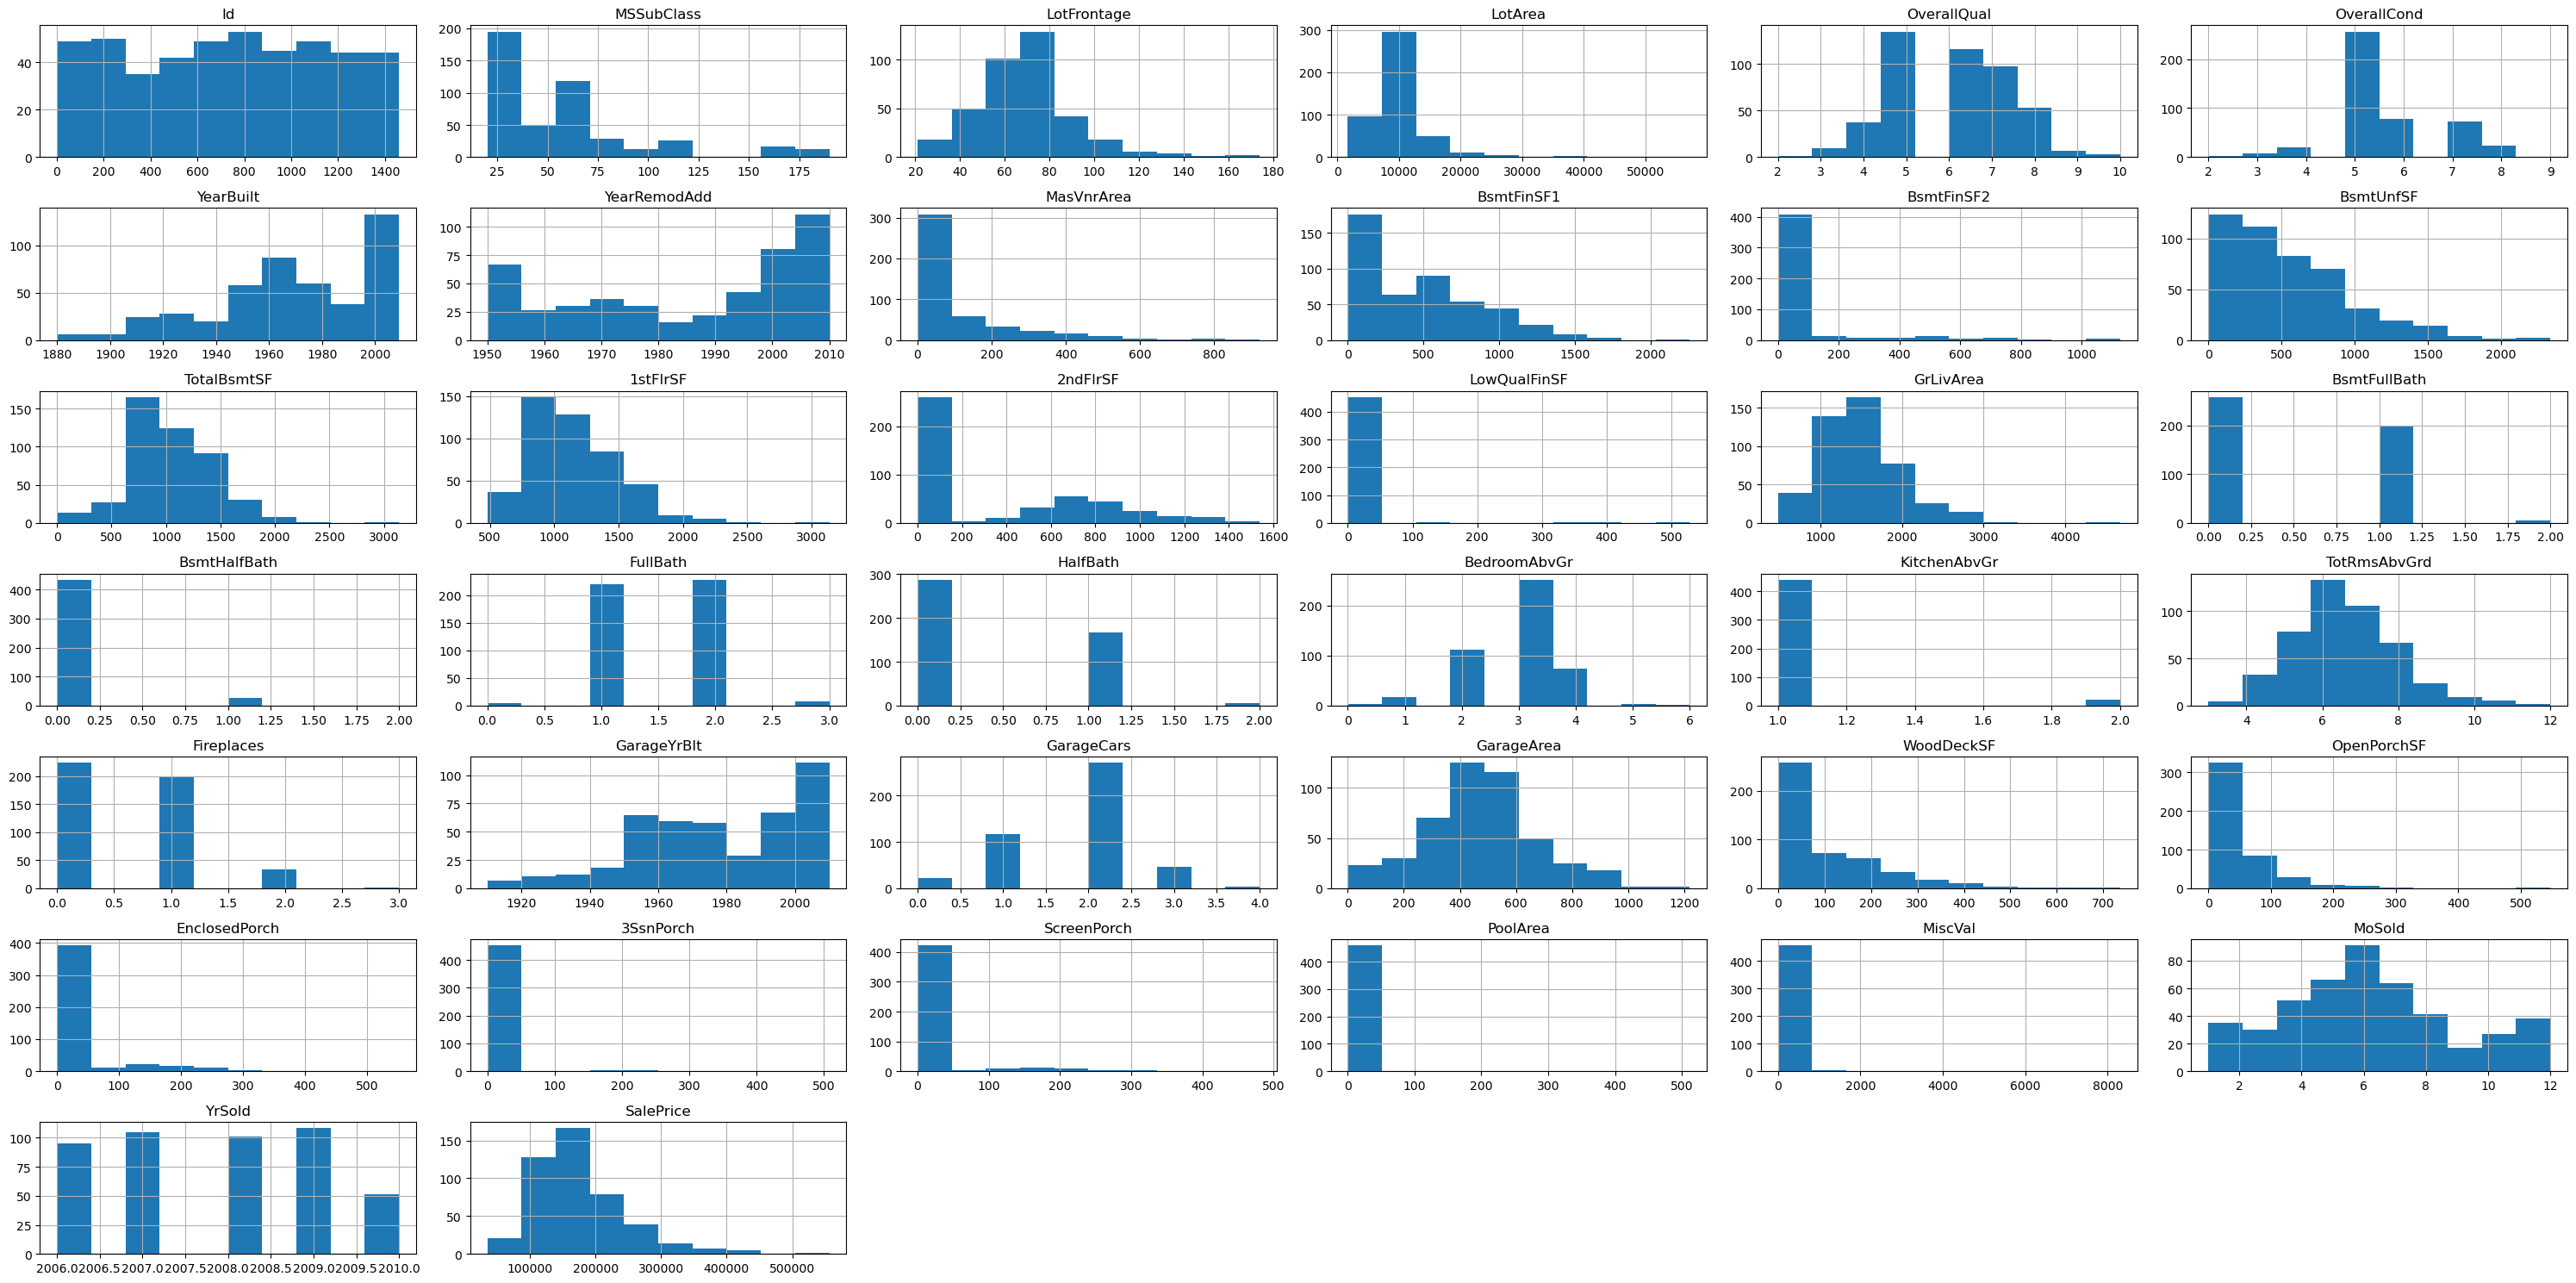

In [22]:
import matplotlib.pyplot as plt

train.hist(figsize=(30,15))
plt.tight_layout()
plt.show()

## <p style="background-color: #EDE7F6; color: #6600ff;margin:0; display:inline-block;padding:.6rem;border-radius:.25rem;">B.Data Pre-processing</p>

 ### <p style="background-color: #EDE7F6;color:#6600ff;display: inline-block;padding:.6rem;border-radius:.5rem">B1.Missing Values (drop nulls)</p>

In [6]:
train.isnull().sum().sort_values(ascending=False)

PoolQC           457
MiscFeature      443
Alley            434
Fence            362
MasVnrType       276
FireplaceQu      225
LotFrontage       78
GarageYrBlt       29
GarageFinish      29
GarageType        29
GarageQual        29
GarageCond        29
BsmtExposure      13
BsmtQual          12
BsmtCond          12
BsmtFinType2      12
BsmtFinType1      12
MasVnrArea         1
Id                 0
Functional         0
Fireplaces         0
KitchenQual        0
KitchenAbvGr       0
BedroomAbvGr       0
HalfBath           0
FullBath           0
BsmtHalfBath       0
BsmtFullBath       0
TotRmsAbvGrd       0
GarageCars         0
LowQualFinSF       0
GarageArea         0
PavedDrive         0
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
GrLivArea          0
HeatingQC          0
2ndFlrSF           0
LandSlope    

In [7]:
Missing = train.isna().mean()*100 # percentage of missing columns
High_missing_columns = Missing[Missing>45]
High_missing_columns.reset_index() 
High_missing_columns.sort_values(ascending=False,inplace =True)
High_missing_columns

PoolQC         99.347826
MiscFeature    96.304348
Alley          94.347826
Fence          78.695652
MasVnrType     60.000000
FireplaceQu    48.913043
dtype: float64

In [8]:
colums_to_drop = train.columns[Missing>45]
colums_to_drop

Index(['Alley', 'MasVnrType', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature'], dtype='object')

In [9]:
train= train.drop(columns = colums_to_drop) 
test = test.drop(columns = colums_to_drop)

 ### <p style="background-color: #EDE7F6;color:#6600ff;display: inline-block;padding:.6rem;border-radius:.5rem">B2.Aggregate Categorical and Numerical</p>

In [10]:
numerical_columns = train.select_dtypes(exclude=['object', 'category'])
numerical_columns.columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [11]:
categorical_columns = train.select_dtypes(include=['object', 'category'])
categorical_columns.columns

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional',
       'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive',
       'SaleType', 'SaleCondition'],
      dtype='object')

 ### <p style="background-color: #EDE7F6;color:#6600ff;display: inline-block;padding:.6rem;border-radius:.5rem">B3.Filling Nulls</p>

In [12]:
def fill_empty_categorical(df):
    for i in categorical_columns:
        df[i].fillna(df[i].mode()[0], inplace=True)
    return df

def fill_empty_numerical(df):
    for i in numerical_columns:
        df[i].fillna(df[i].median(), inplace=True)  
    return df

train = fill_empty_categorical(train)
train = fill_empty_numerical(train)

test = fill_empty_categorical(test)
test = fill_empty_numerical(test)

KeyError: 'SalePrice'

In [ ]:
train.isnull().sum().sort_values(ascending=False)

 ### <p style="background-color: #EDE7F6;color:#6600ff;display: inline-block;padding:.6rem;border-radius:.5rem">B4.Remove Duplicates and Unnecessary Columns</p>

In [ ]:
train.duplicated().sum()

In [ ]:
test.duplicated().sum()

In [ ]:
train = train.drop(['Utilities','Street','Id'], axis=1).copy()
test = test.drop(['Utilities','Street','Id'], axis=1).copy()

## <p style="background-color: #EDE7F6; color: #6600ff;margin:0; display:inline-block;padding:.6rem;border-radius:.25rem;">C.Data Processing</p>

In [13]:
X = train.drop(columns=['SalePrice']).copy()
y = train['SalePrice']

### <p style="background-color: #EDE7F6; color: #6600ff;margin:0; display:inline-block;padding:.6rem;border-radius:.25rem;">C1.Get Dummies</p>

In [14]:
num_cols = X.select_dtypes('bool').columns
num_cols

Index([], dtype='object')

In [15]:
categorical_cols = [cname for cname in X.columns if  
                        X[cname].dtype in ['object','category'] and X[cname].nunique() <6]
categorical_cols

['MSZoning',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Condition2',
 'BldgType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive']

In [16]:
num_cols = [cname for cname in X.columns if  
                        X[cname].dtype in ['float64'] and X[cname].nunique() <6]
num_cols

[]

In [17]:
X = pd.get_dummies(X, columns=categorical_cols)
test = pd.get_dummies(test, columns=categorical_cols)

### <p style="background-color: #EDE7F6; color: #6600ff;margin:0; display:inline-block;padding:.6rem;border-radius:.25rem;">C2.Skewness of distributions (optional)</p>

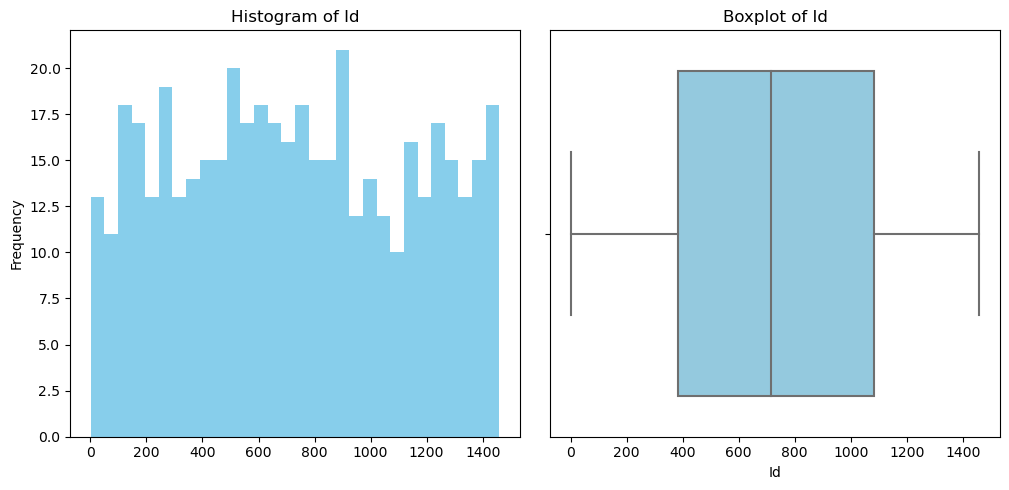

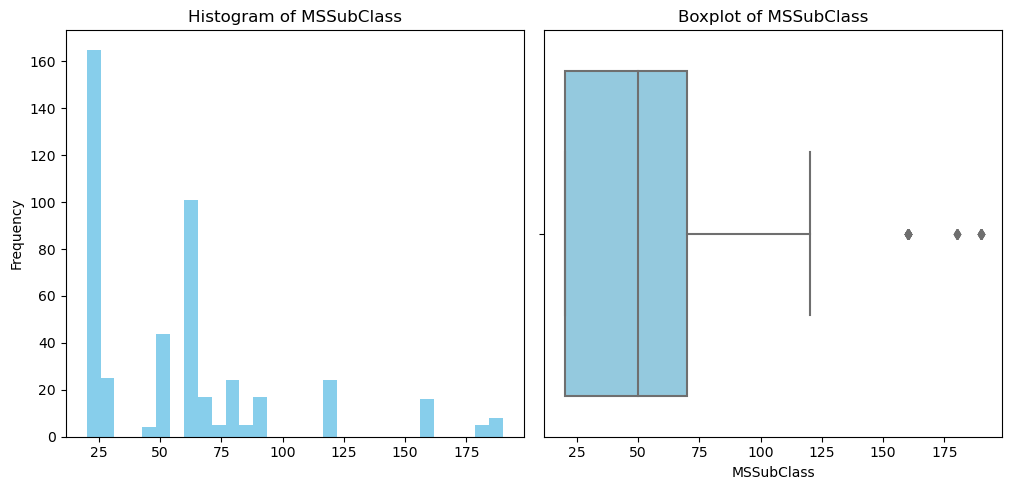

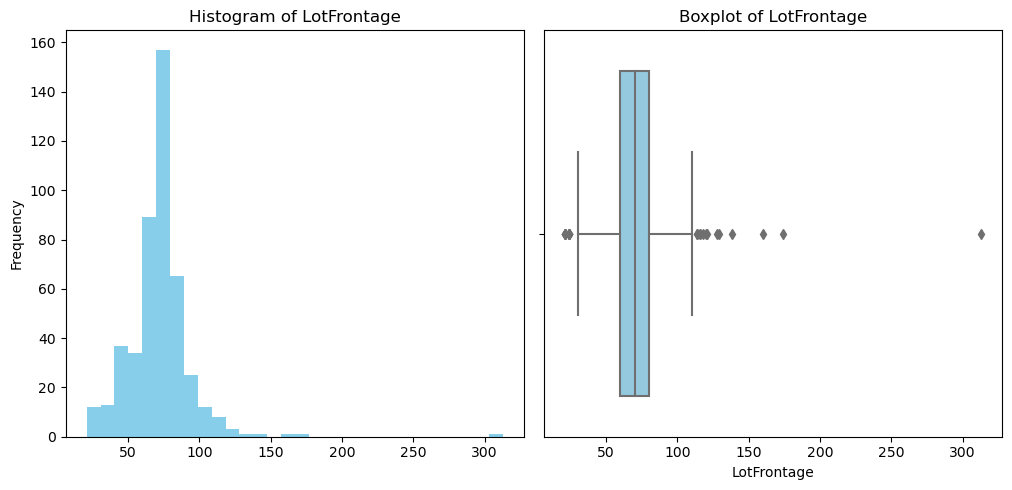

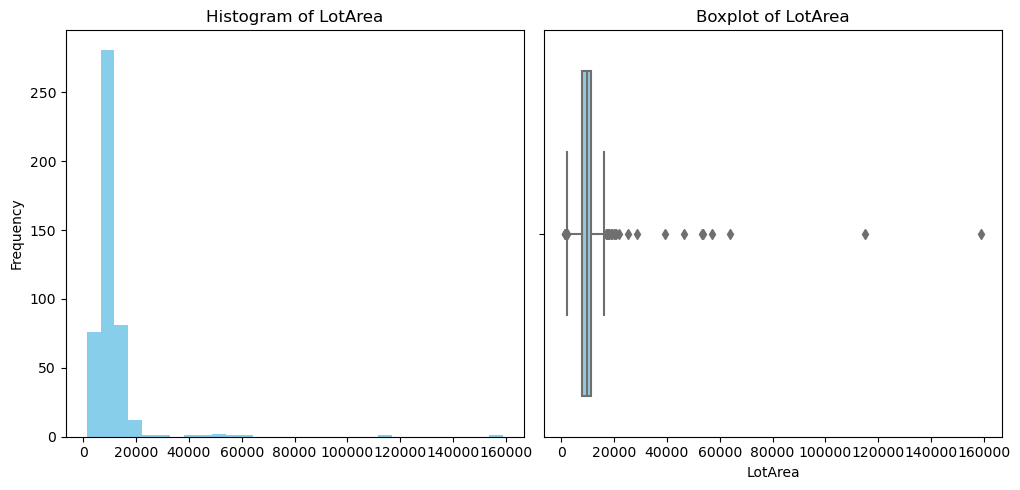

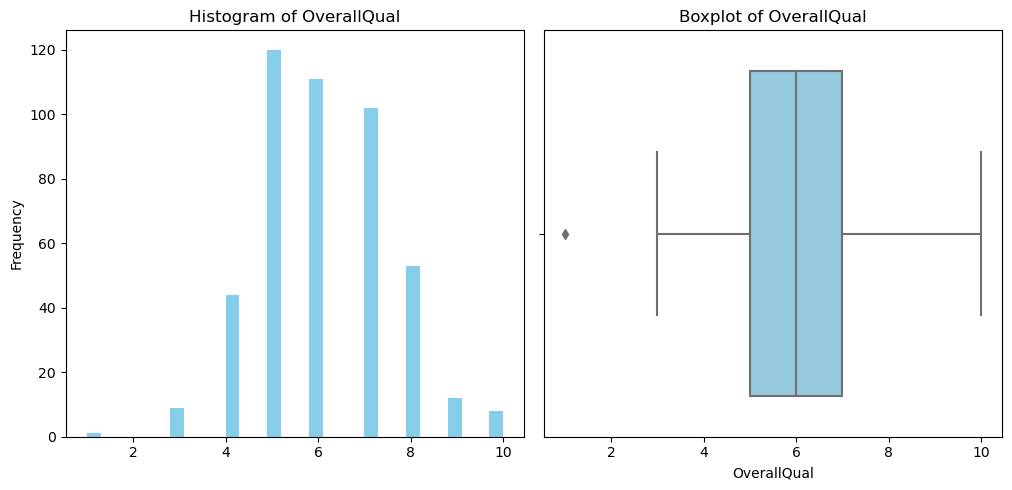

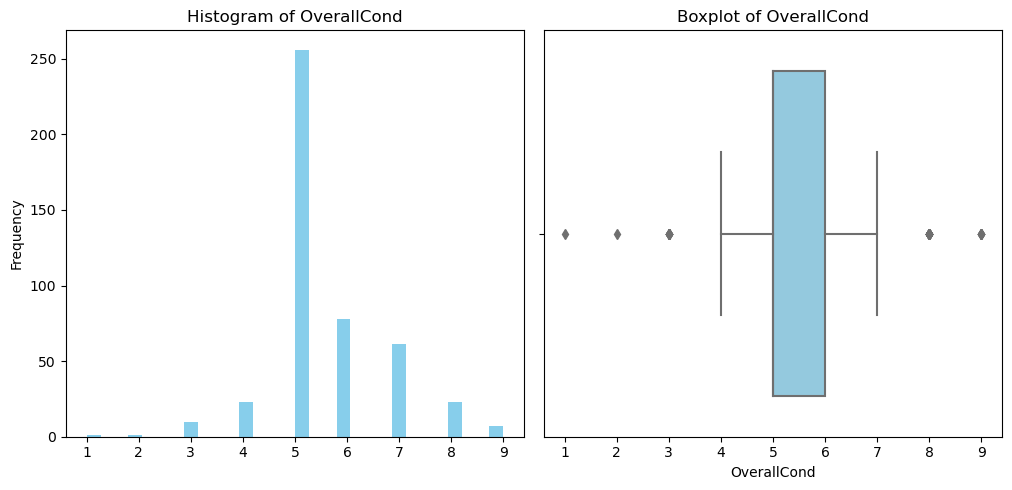

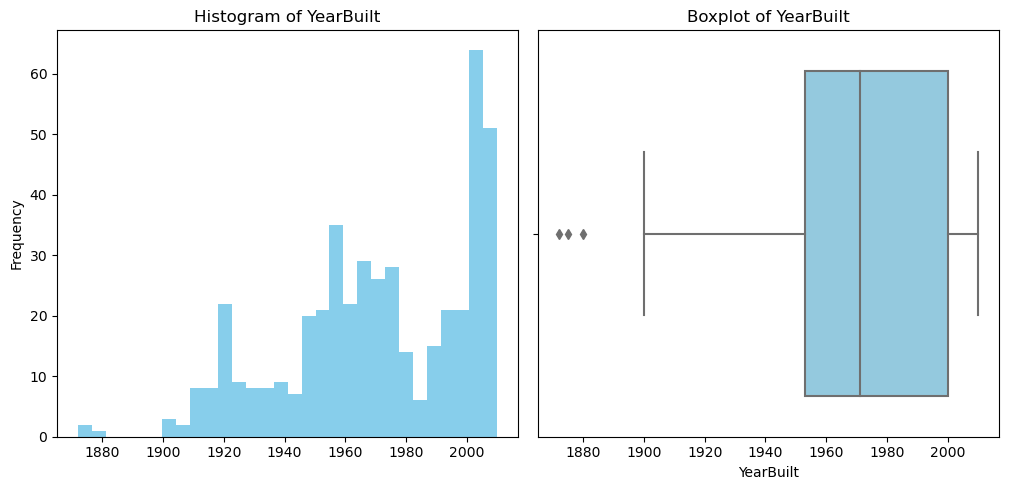

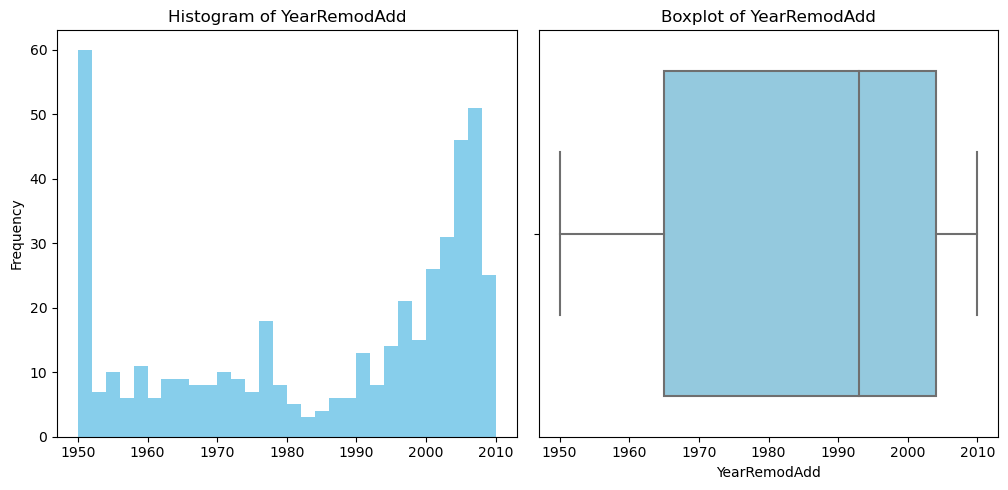

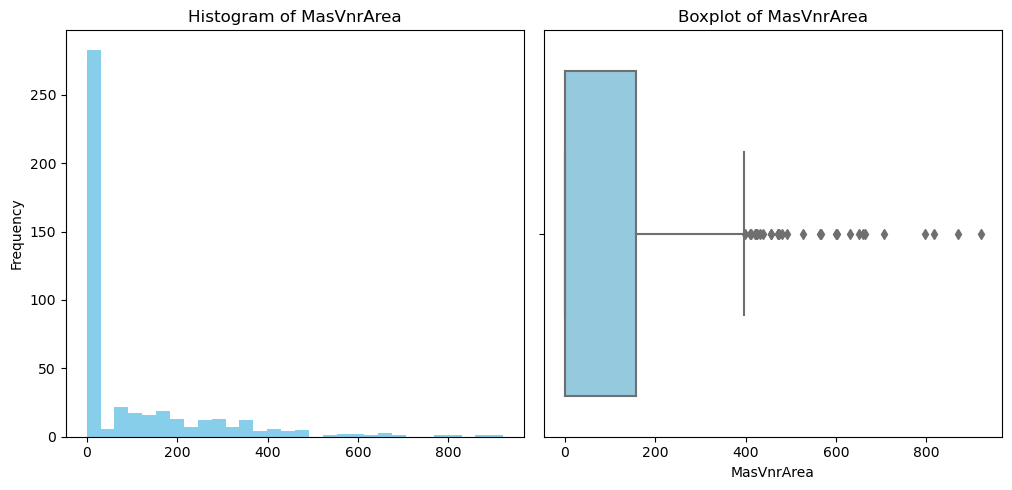

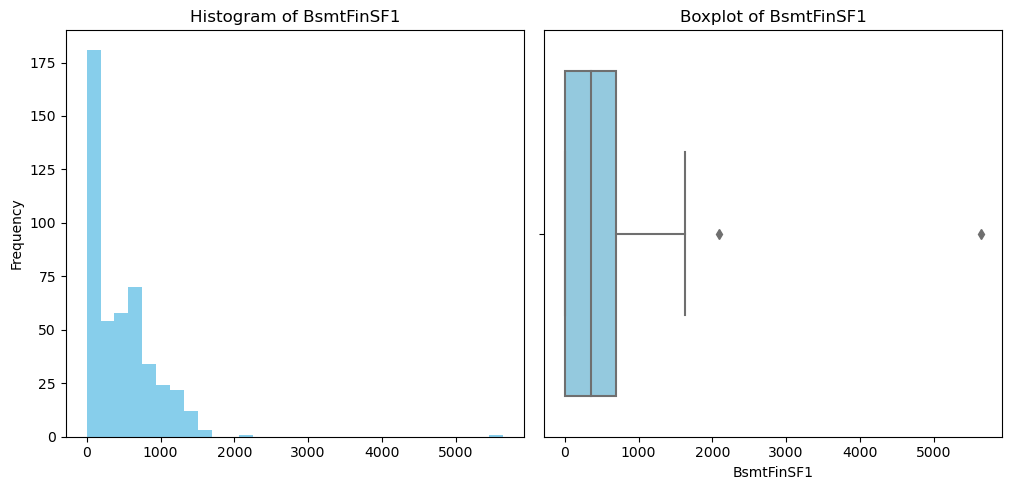

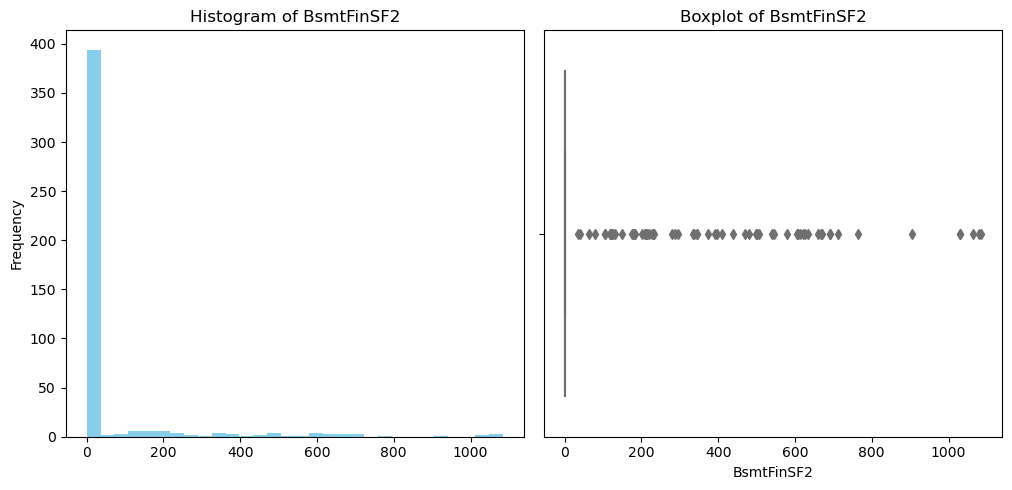

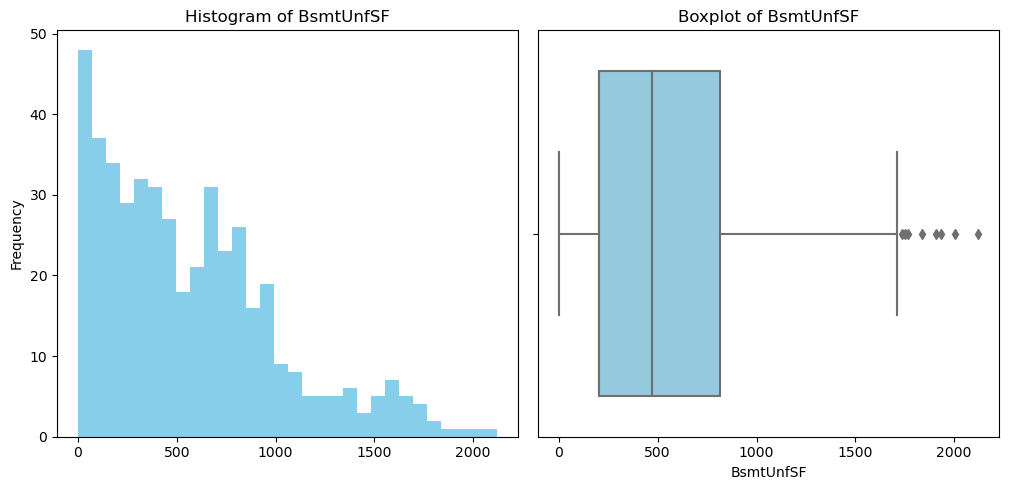

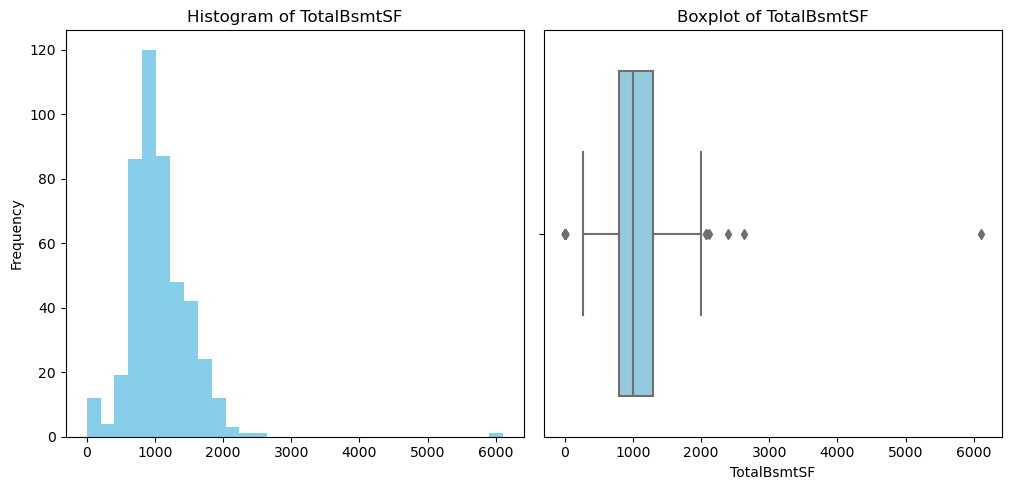

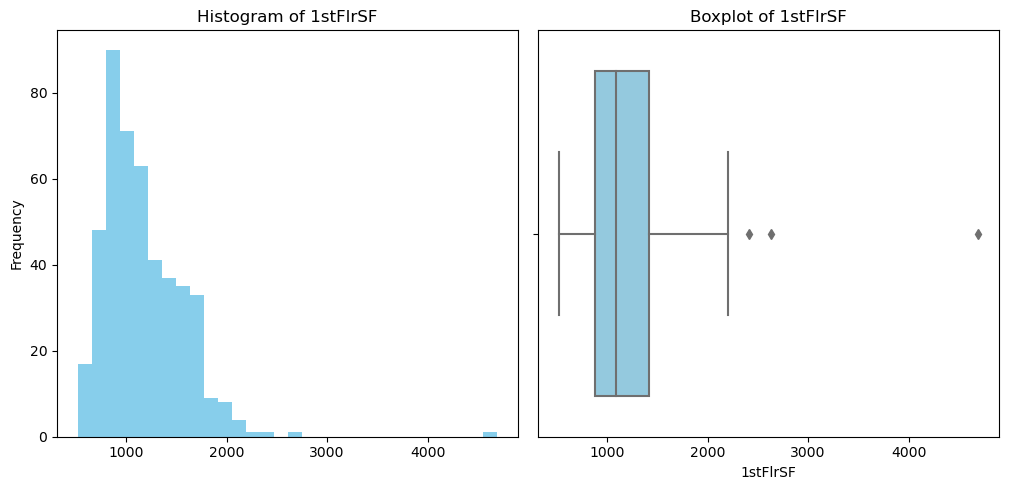

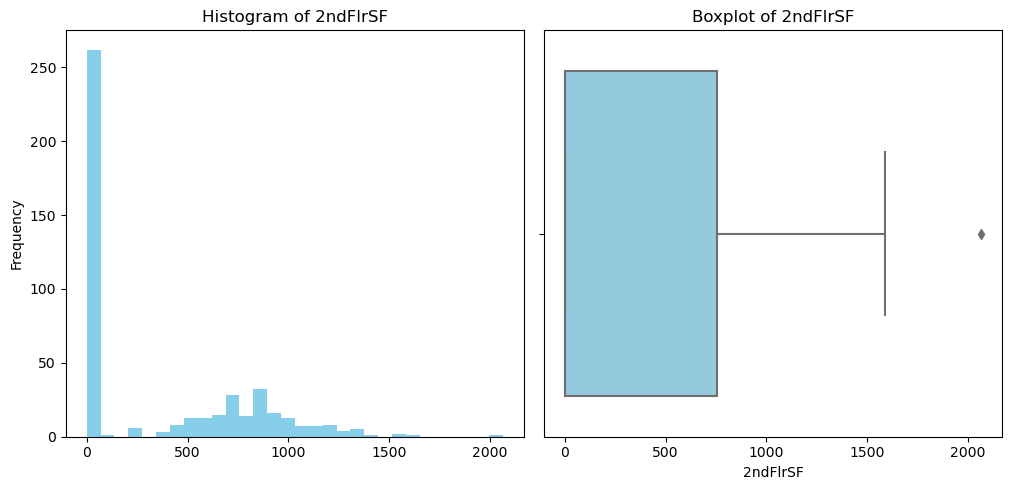

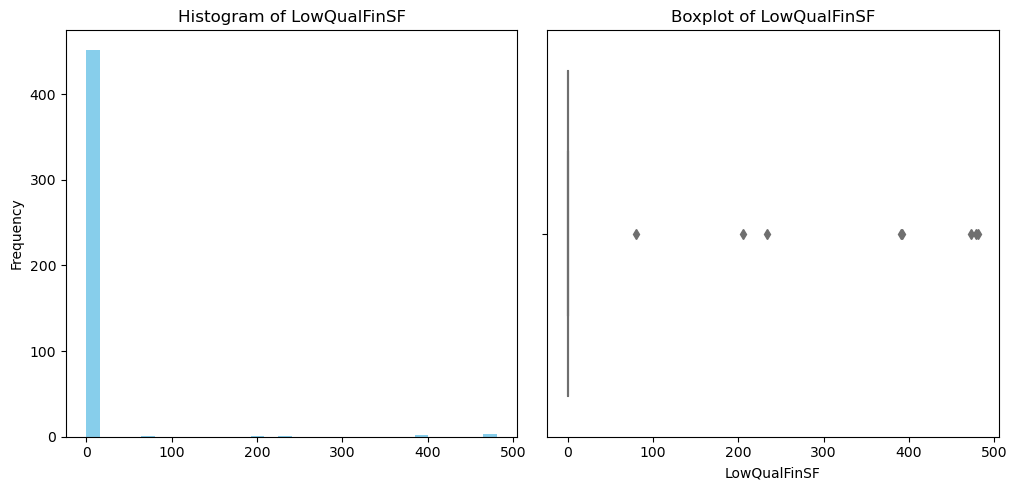

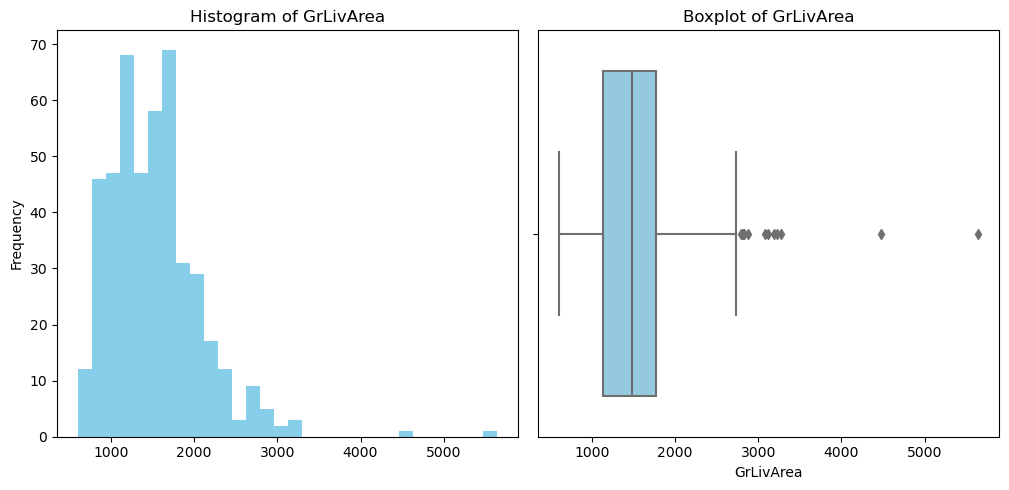

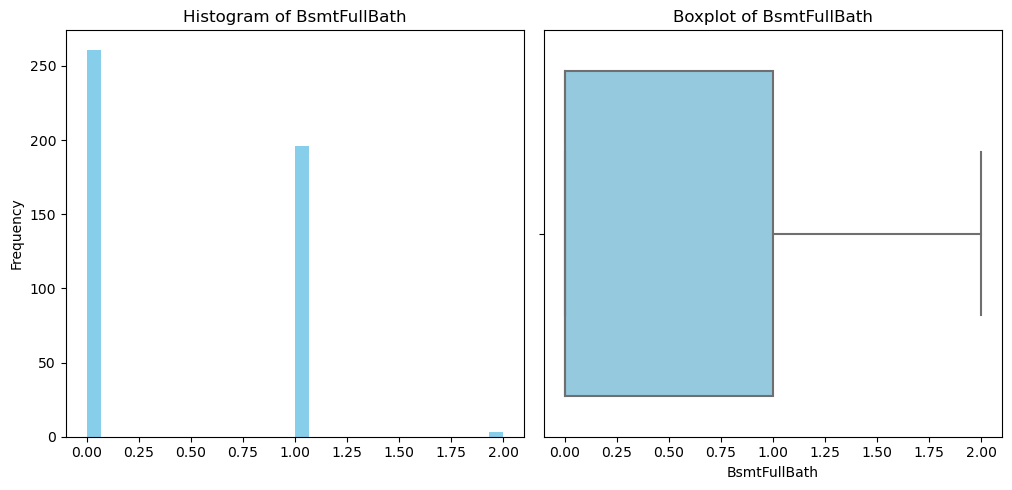

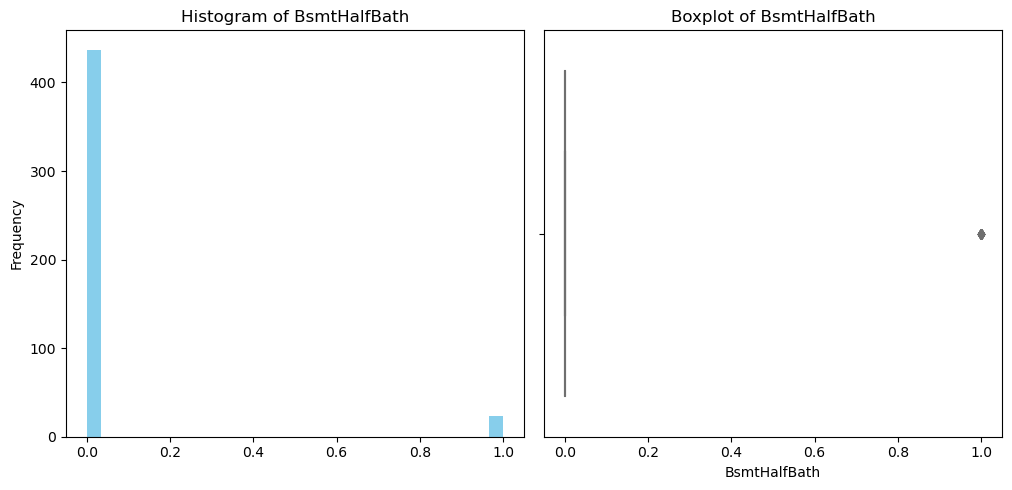

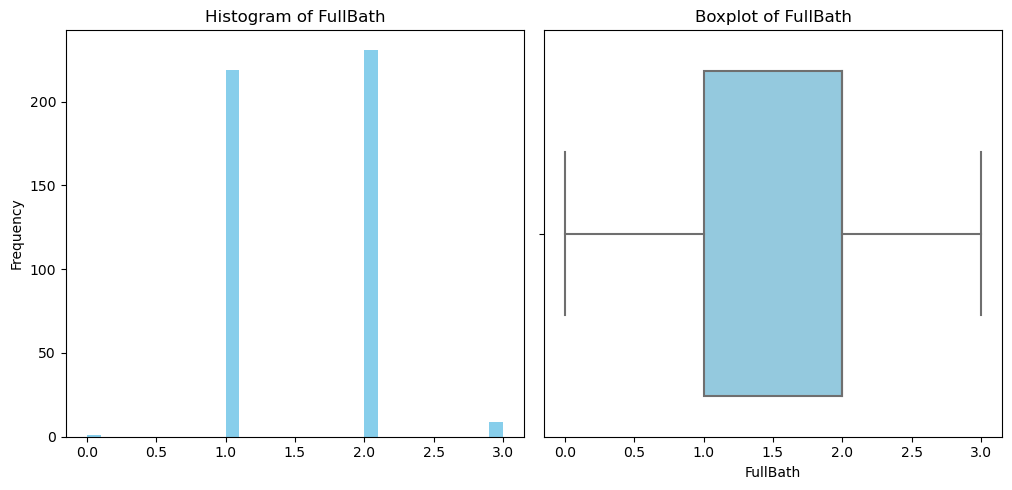

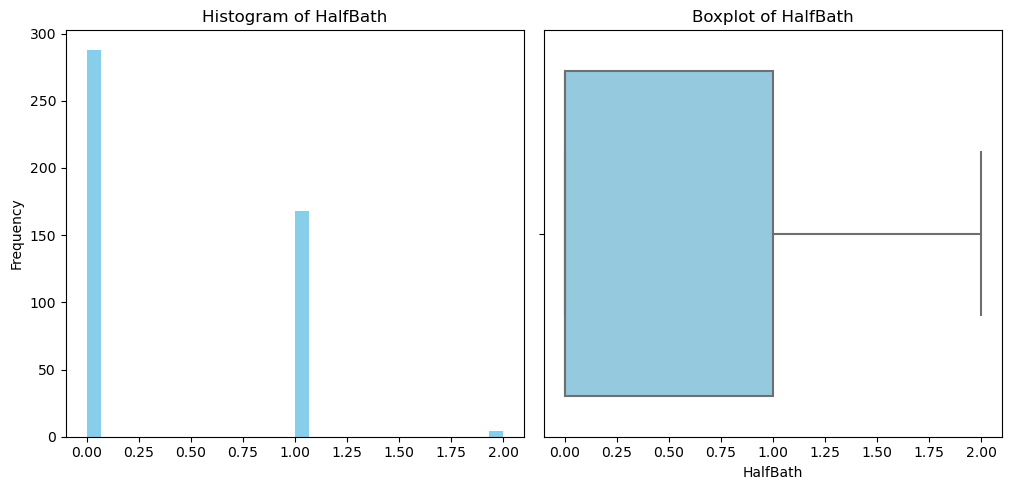

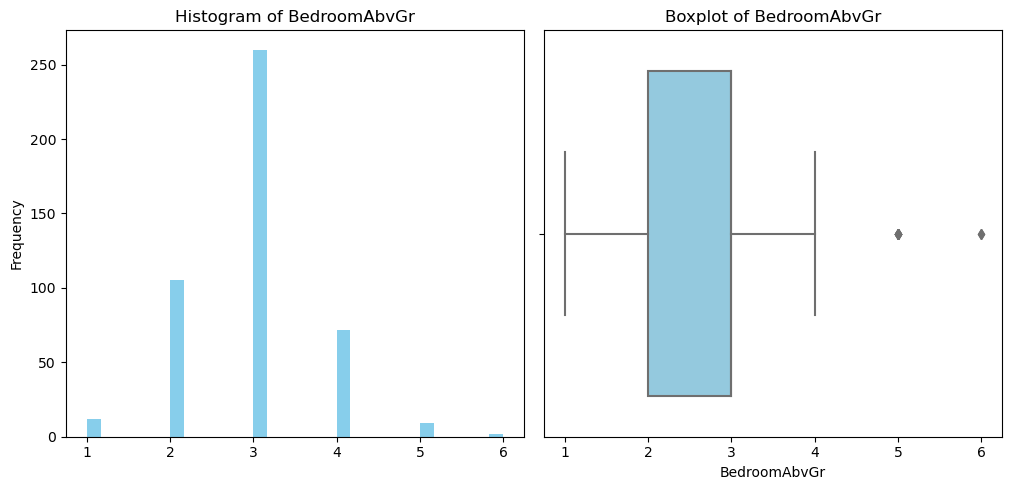

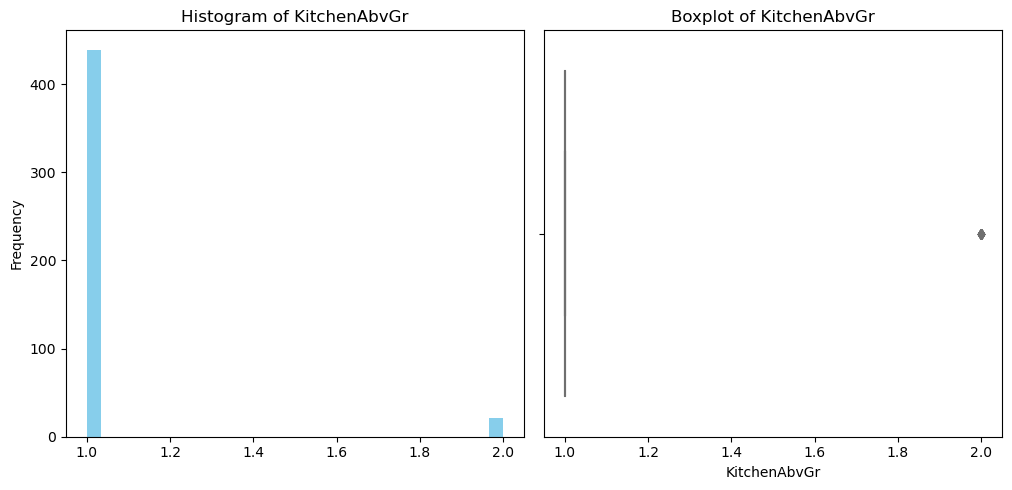

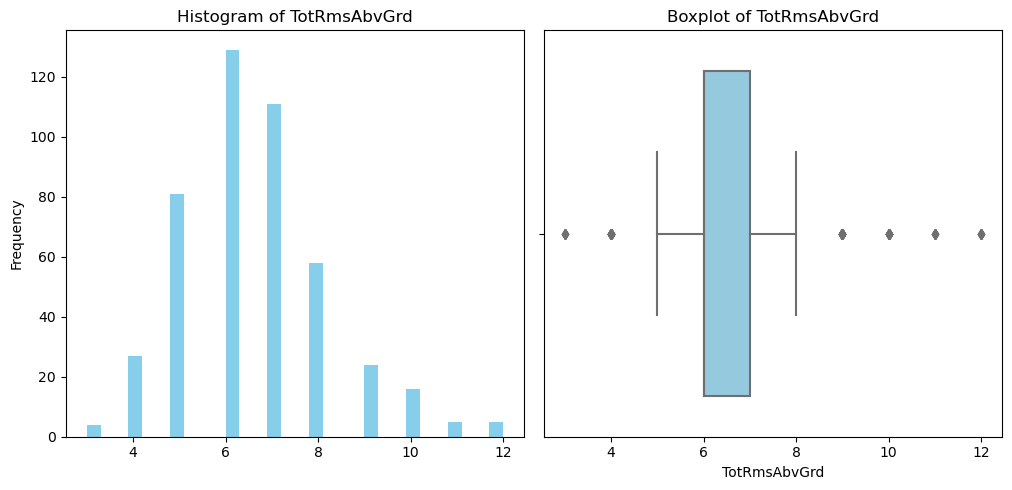

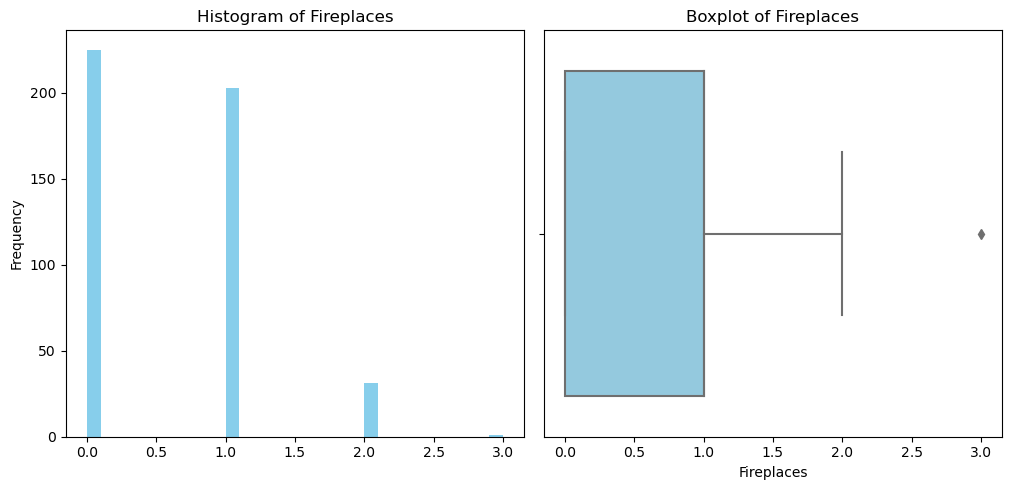

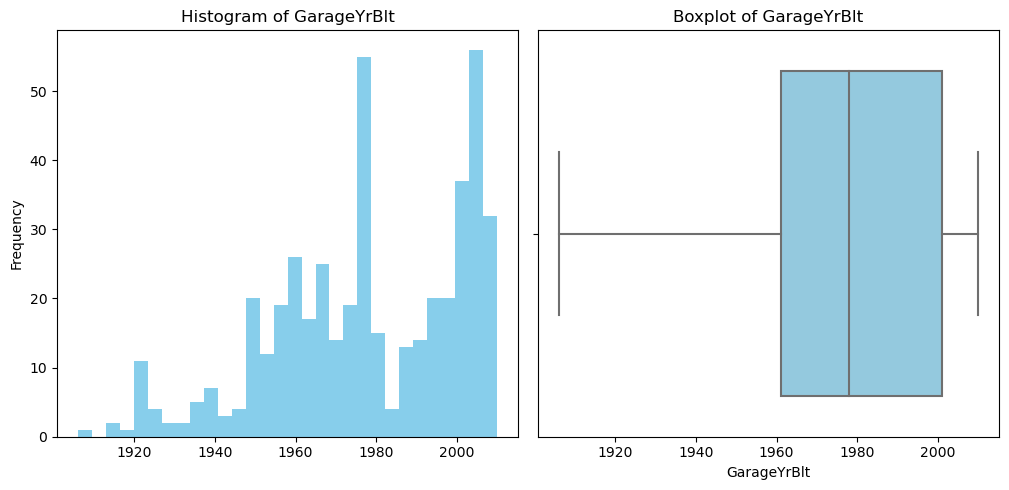

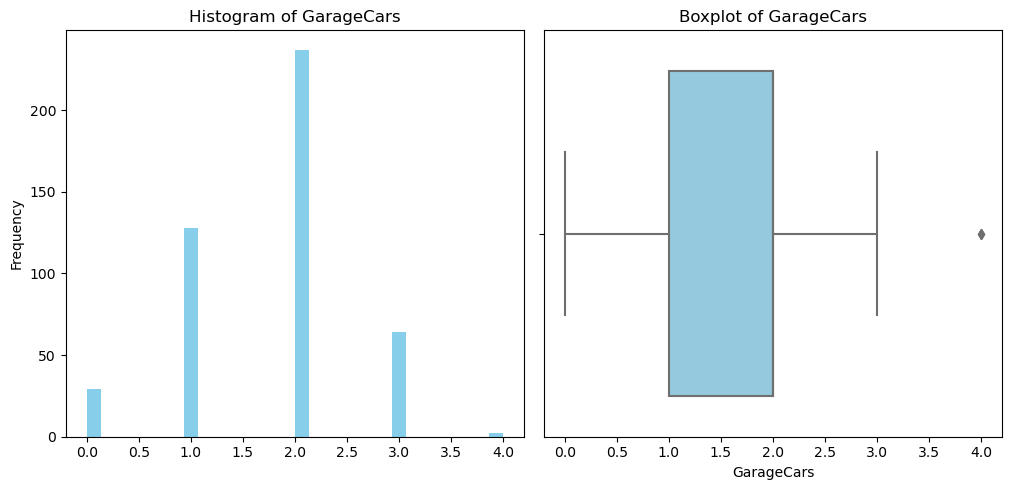

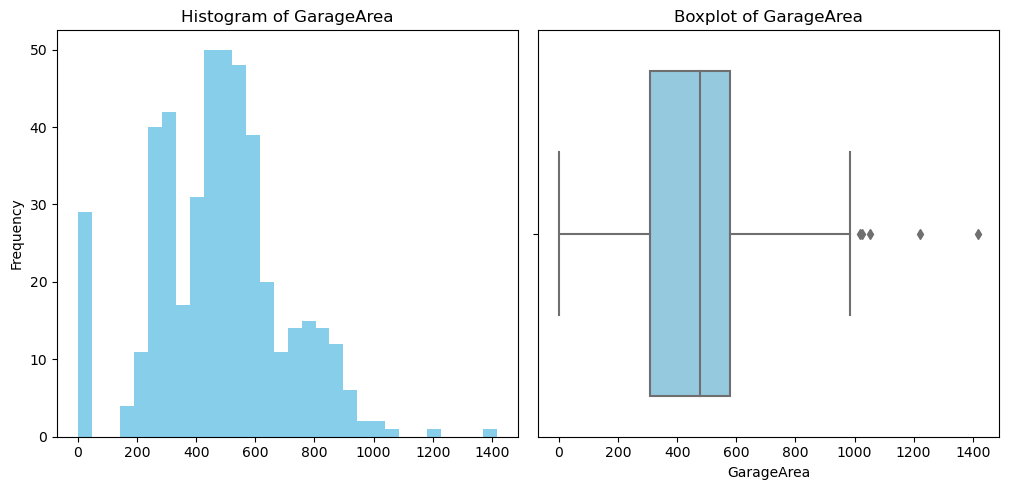

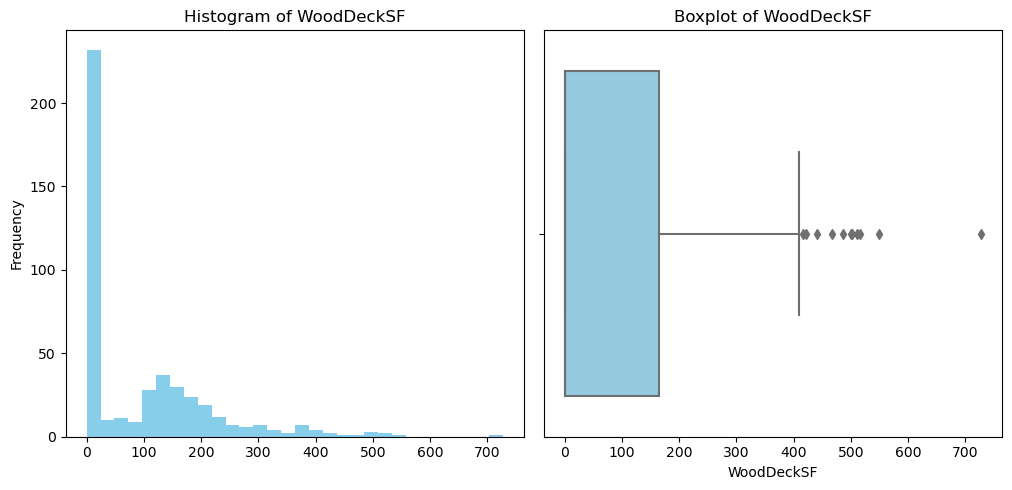

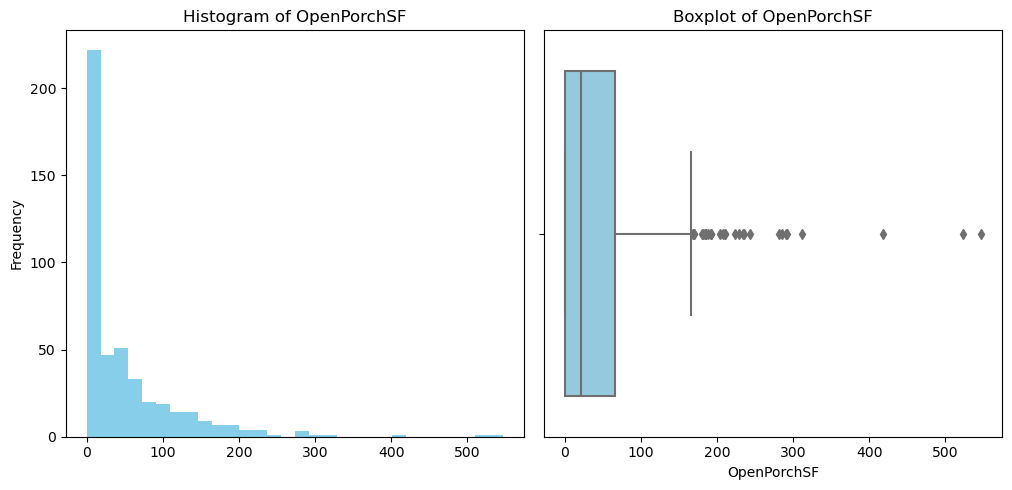

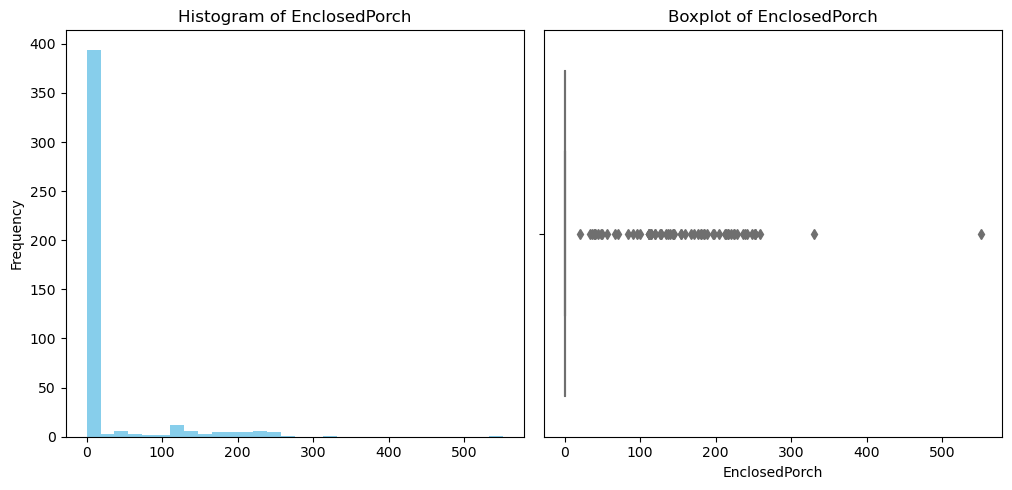

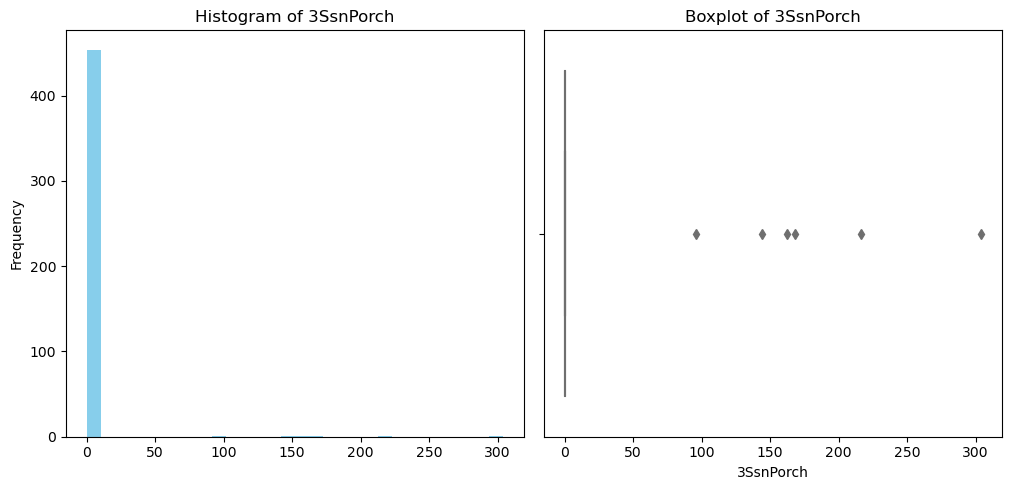

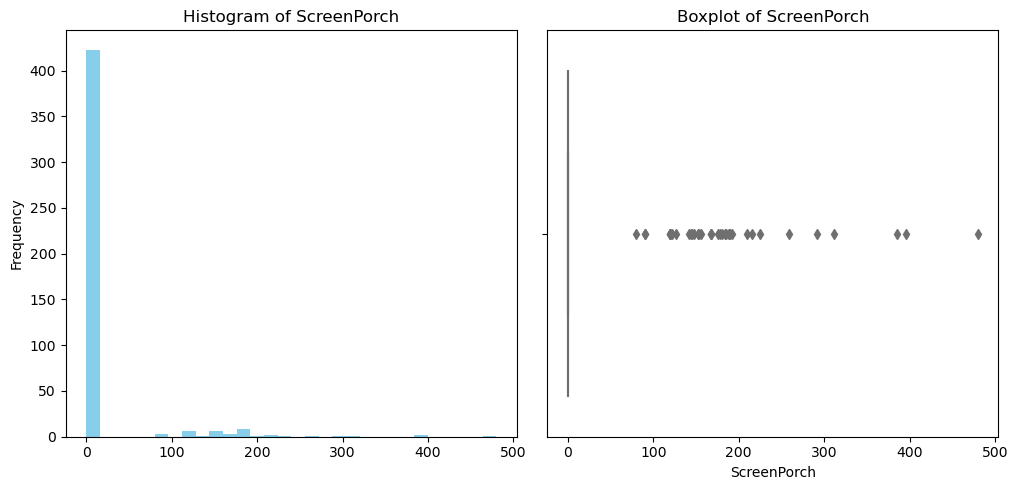

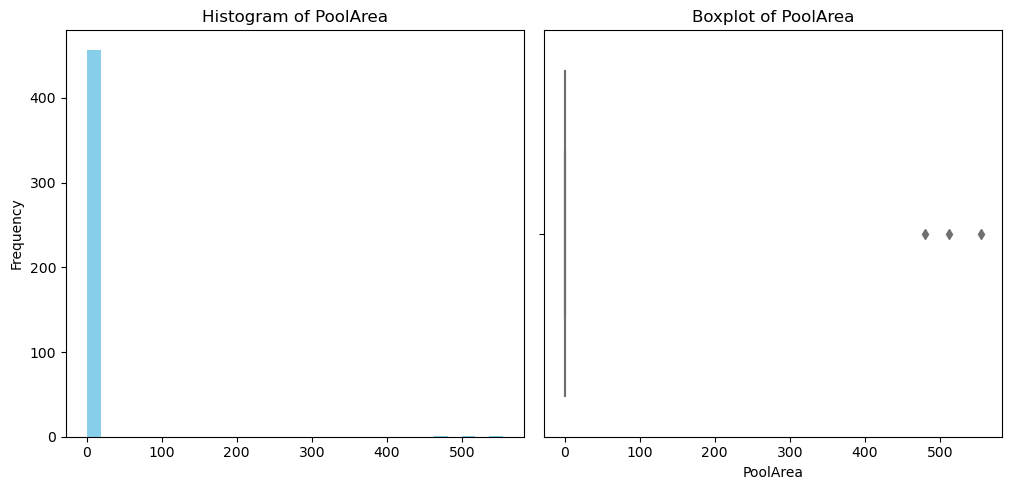

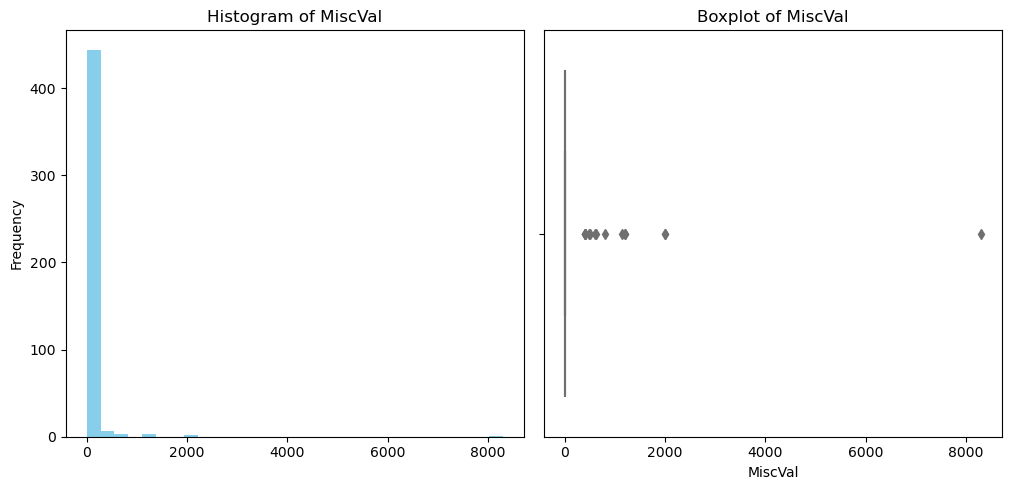

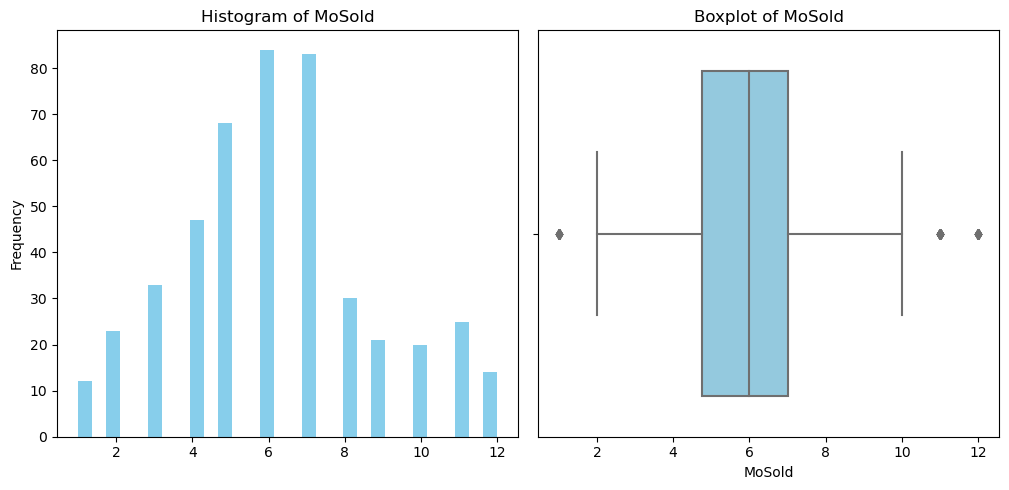

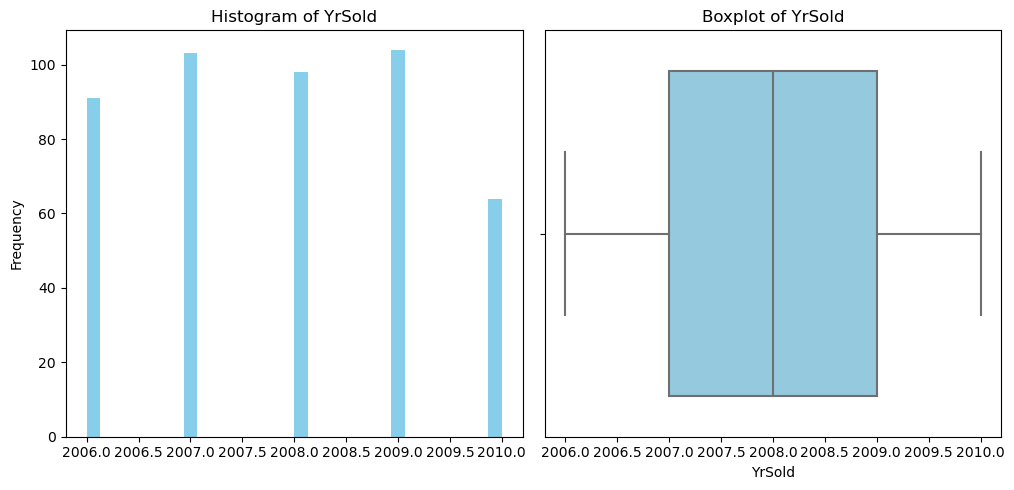

KeyError: 'SalePrice'

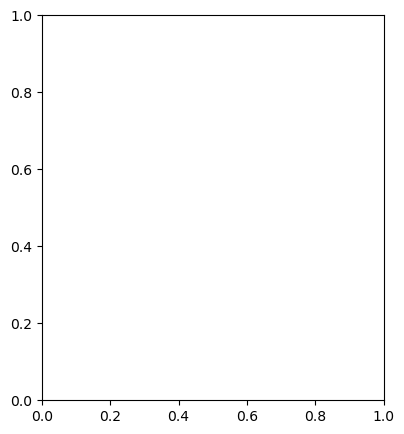

In [18]:
def plot_detect_outliers (columns=numerical_columns):
    for col in numerical_columns:
        plt.figure(figsize=(15, 5))

        # Histogram
        plt.subplot(1, 3, 1)
        X[col].plot.hist(bins=30, color='skyblue')
        plt.title(f'Histogram of {col}')

        # Boxplot
        plt.subplot(1, 3, 2)
        sns.boxplot(x=X[col],color='skyblue')
        plt.title(f'Boxplot of {col}')

        plt.tight_layout()
        plt.show()
        
plot_detect_outliers (numerical_columns)

In [19]:
numerical_columns = X.select_dtypes(include=['number']).columns
numerical_columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold'],
      dtype='object')

### <p style="background-color: #EDE7F6; color: #6600ff;margin:0; display:inline-block;padding:.6rem;border-radius:.25rem;">C3.Detect Outliers</p>

In [21]:
def calculate_outliers_percentage(df):

    outlier_counts = {}

    for column in df.select_dtypes(include=['number']).columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Calculate outliers
        outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
        outlier_counts[column] = len(outliers)

    # Print the percentage of outliers for each column
    for column in outlier_counts:
        percentage = (outlier_counts[column] / len(df)) * 100
        print(f"Percentage of outliers in {column}: {percentage:.2f}%")

print("Train data:")
calculate_outliers_percentage(X)
print("Test data:")
calculate_outliers_percentage(test)

Train data:
Percentage of outliers in Id: 0.00%
Percentage of outliers in MSSubClass: 6.30%
Percentage of outliers in LotFrontage: 5.22%
Percentage of outliers in LotArea: 6.52%
Percentage of outliers in OverallQual: 0.22%
Percentage of outliers in OverallCond: 9.13%
Percentage of outliers in YearBuilt: 0.65%
Percentage of outliers in YearRemodAdd: 0.00%
Percentage of outliers in MasVnrArea: 6.52%
Percentage of outliers in BsmtFinSF1: 0.43%
Percentage of outliers in BsmtFinSF2: 14.57%
Percentage of outliers in BsmtUnfSF: 1.74%
Percentage of outliers in TotalBsmtSF: 3.91%
Percentage of outliers in 1stFlrSF: 0.65%
Percentage of outliers in 2ndFlrSF: 0.22%
Percentage of outliers in LowQualFinSF: 1.74%
Percentage of outliers in GrLivArea: 2.61%
Percentage of outliers in BsmtFullBath: 0.00%
Percentage of outliers in BsmtHalfBath: 5.00%
Percentage of outliers in FullBath: 0.00%
Percentage of outliers in HalfBath: 0.00%
Percentage of outliers in BedroomAbvGr: 2.39%
Percentage of outliers in K

In [22]:
def handle_outliers(df):

    for column in df.select_dtypes(include=['number']).columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        df[column] = df[column].clip(lower=lower_bound, upper=upper_bound)
    #clip: everything smaller than lower_bound = lower_bound / everything grater than upper_bound = upper_bound
    return df

X = handle_outliers(X)
test = handle_outliers(test)

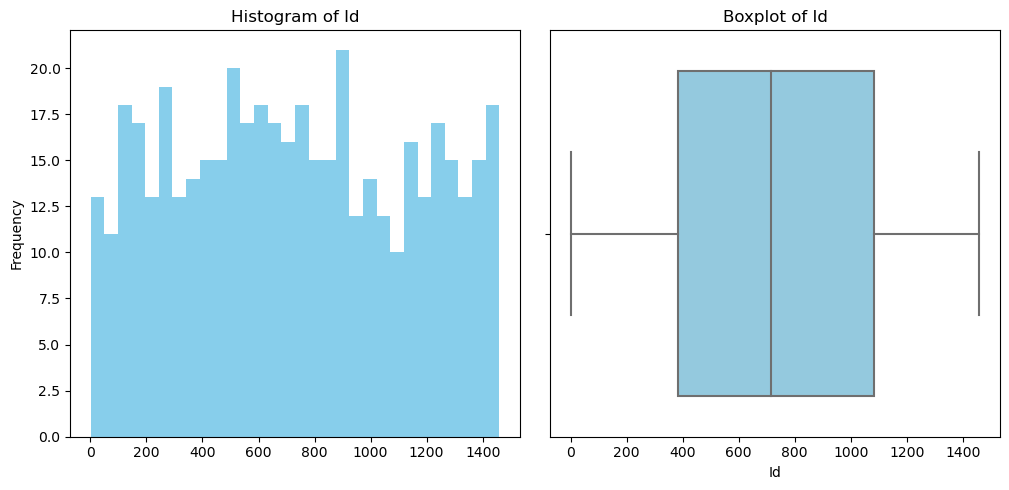

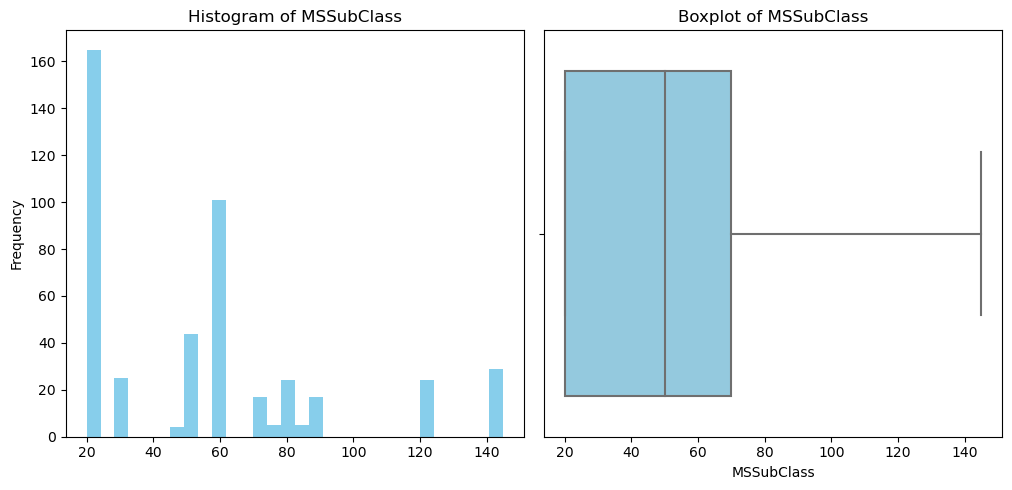

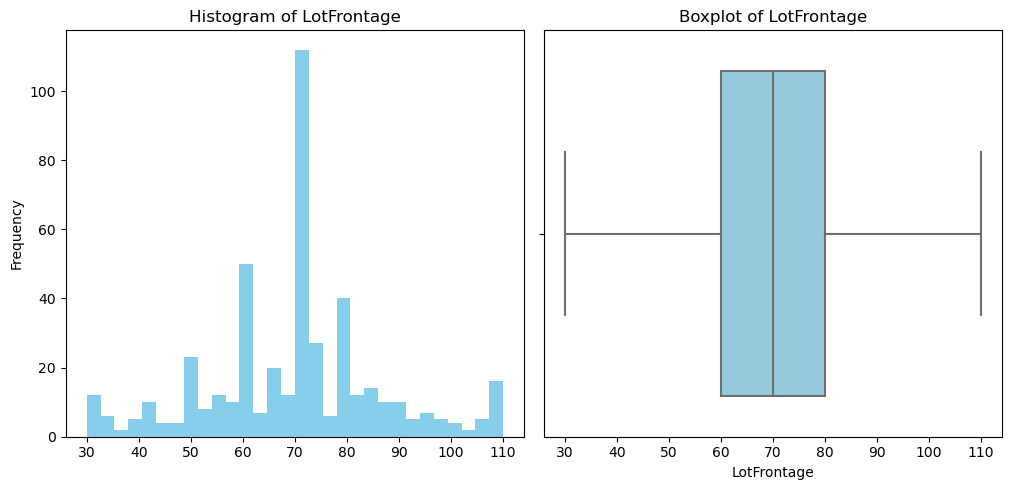

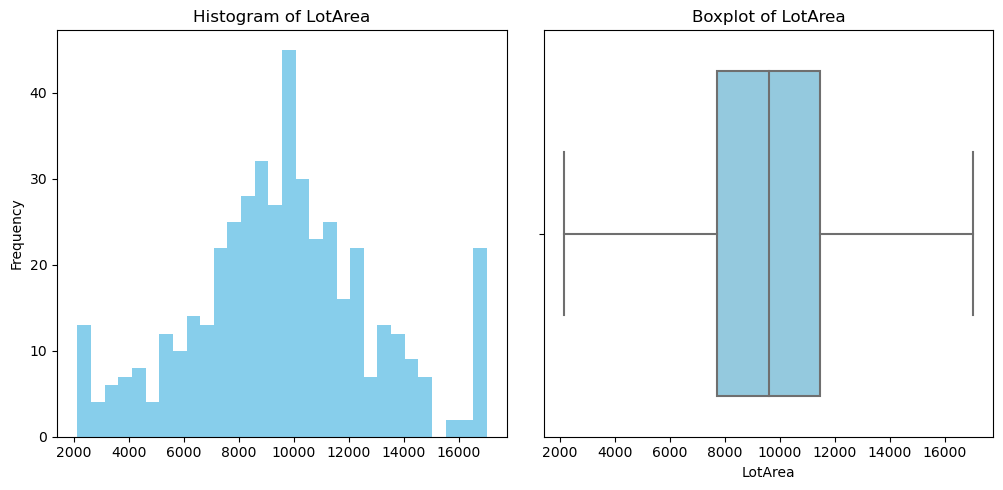

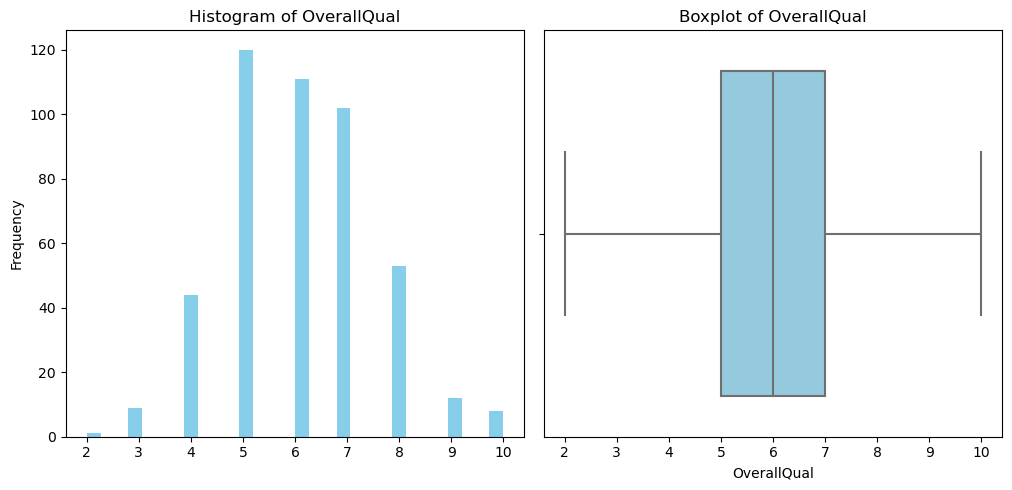

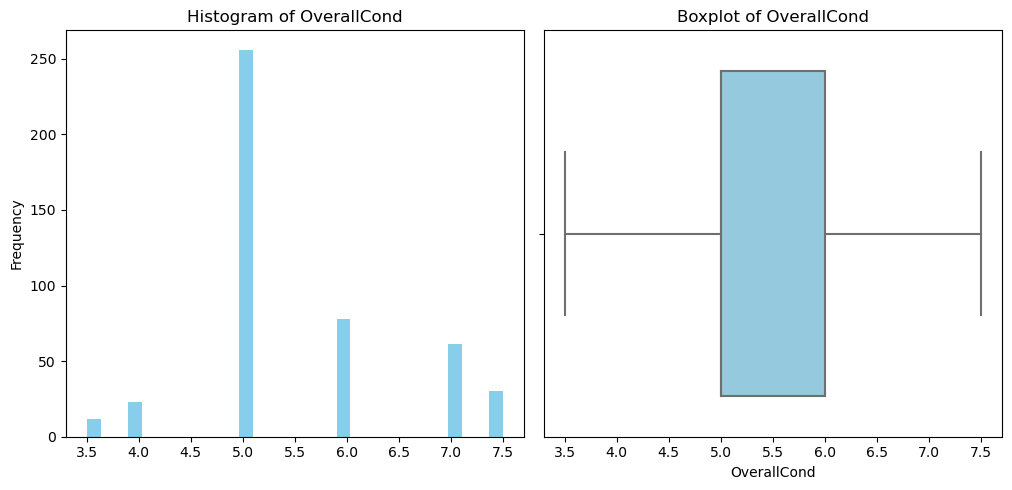

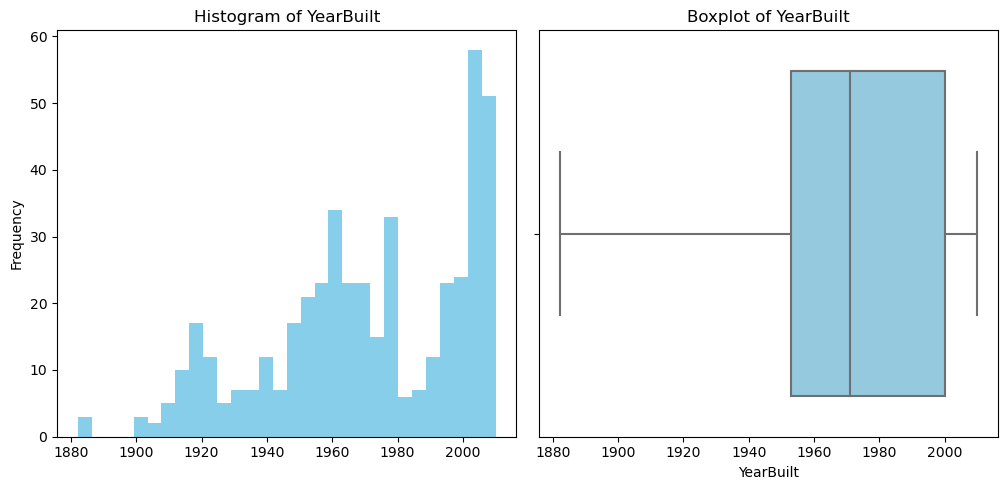

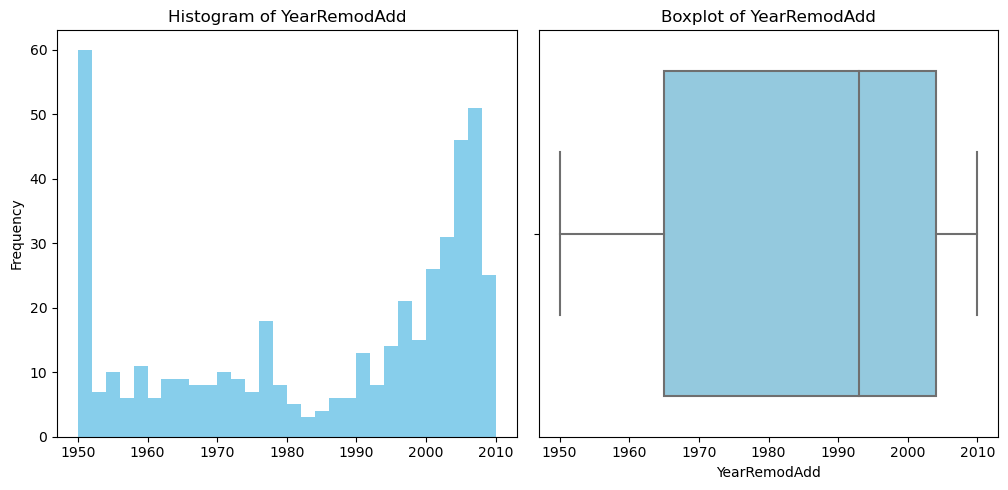

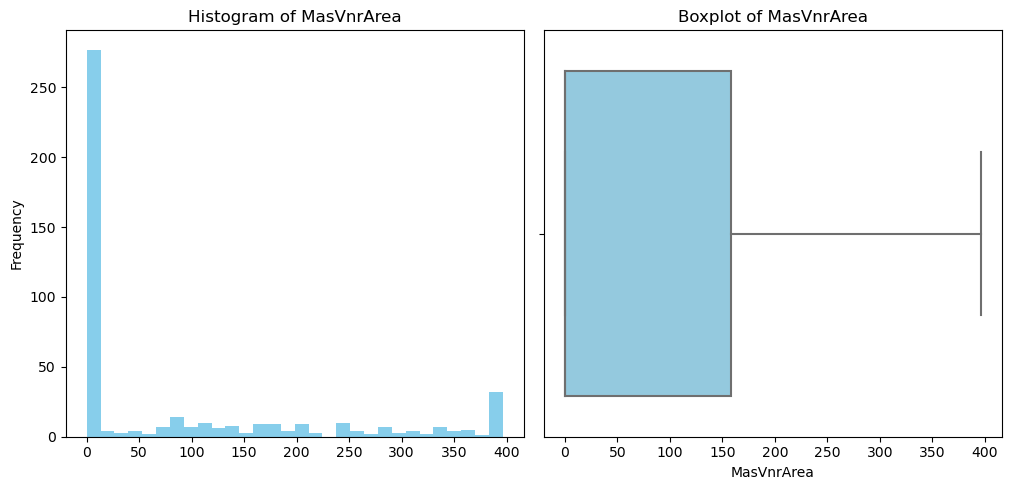

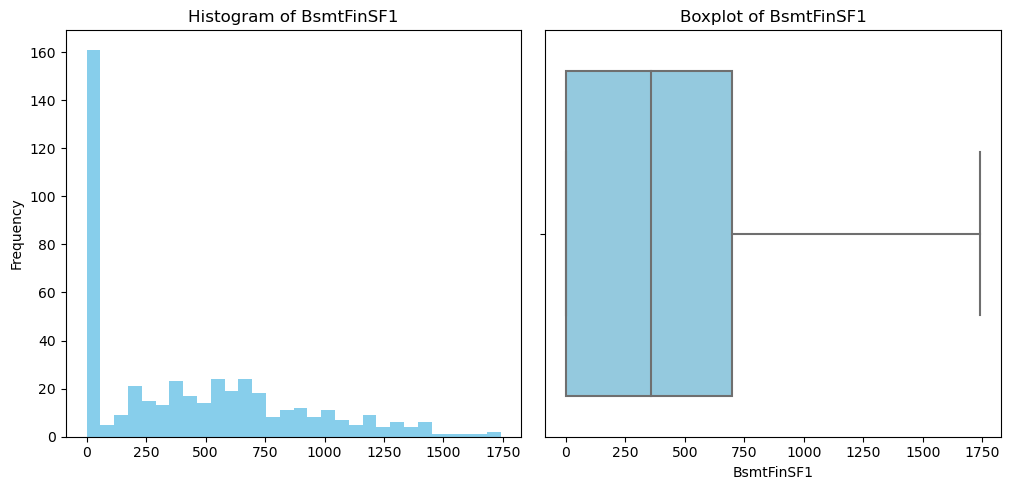

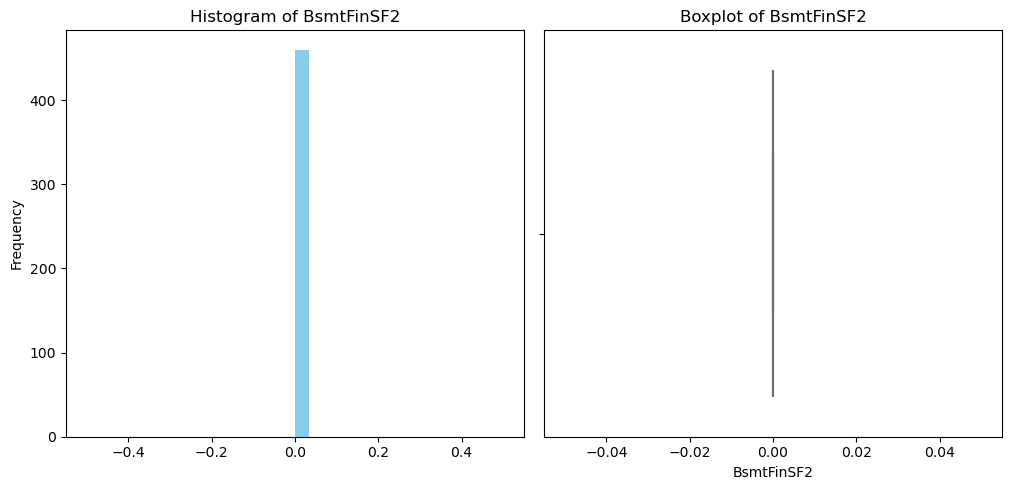

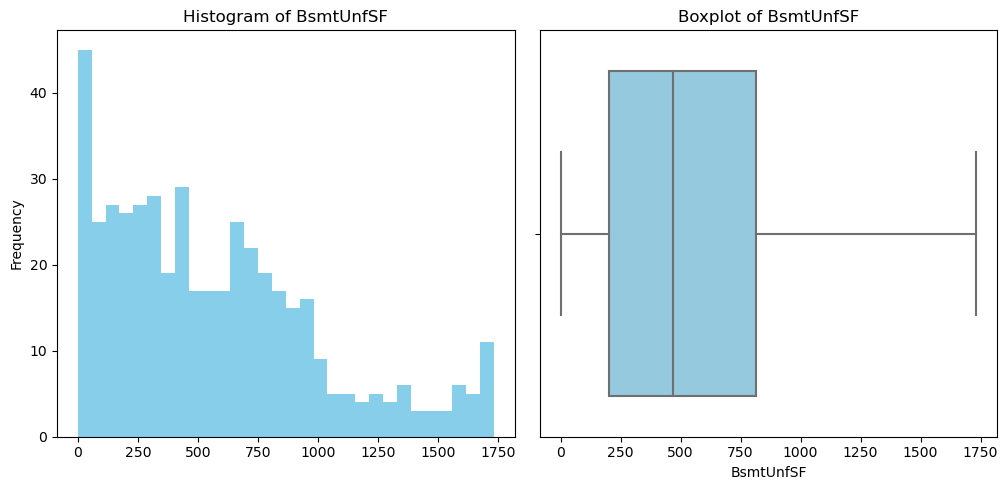

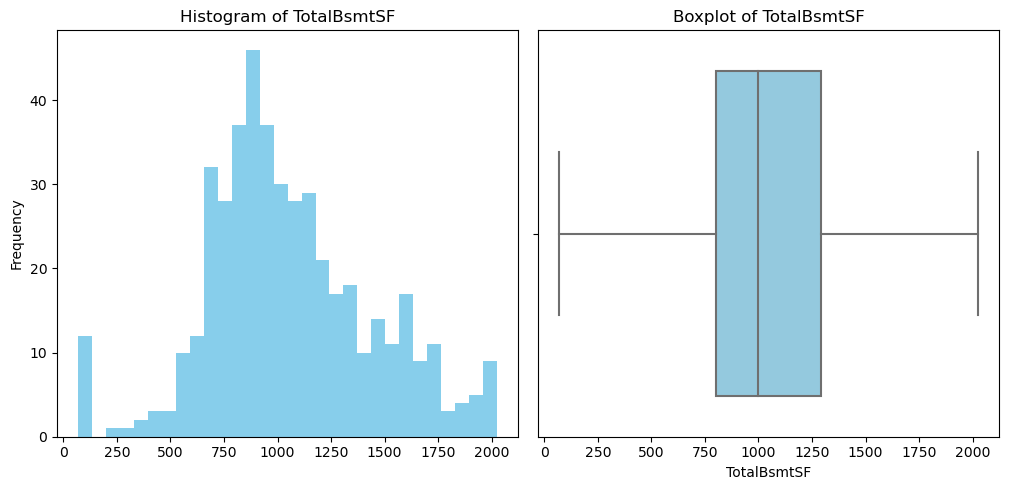

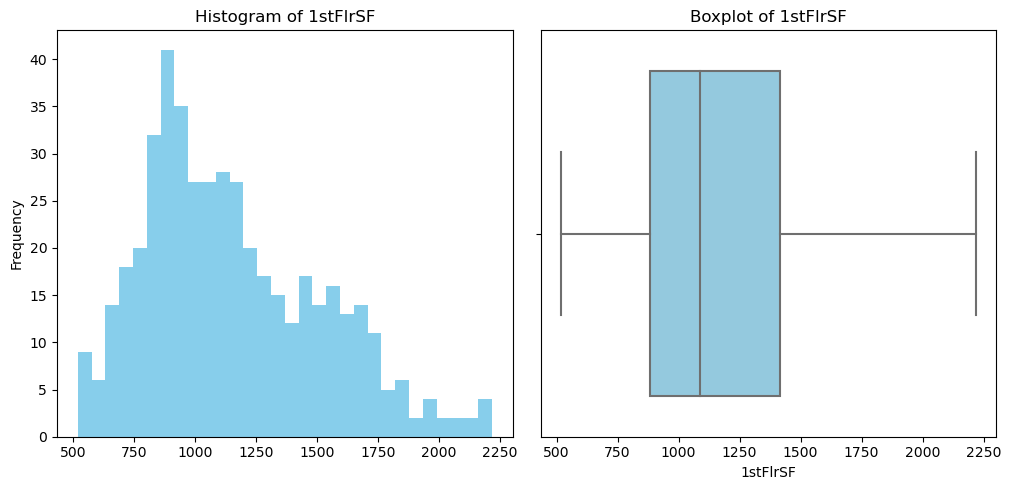

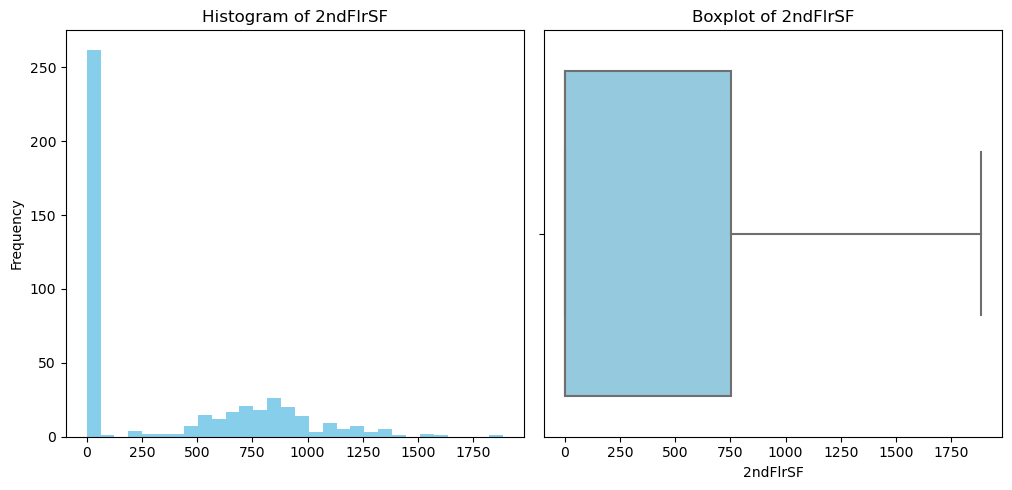

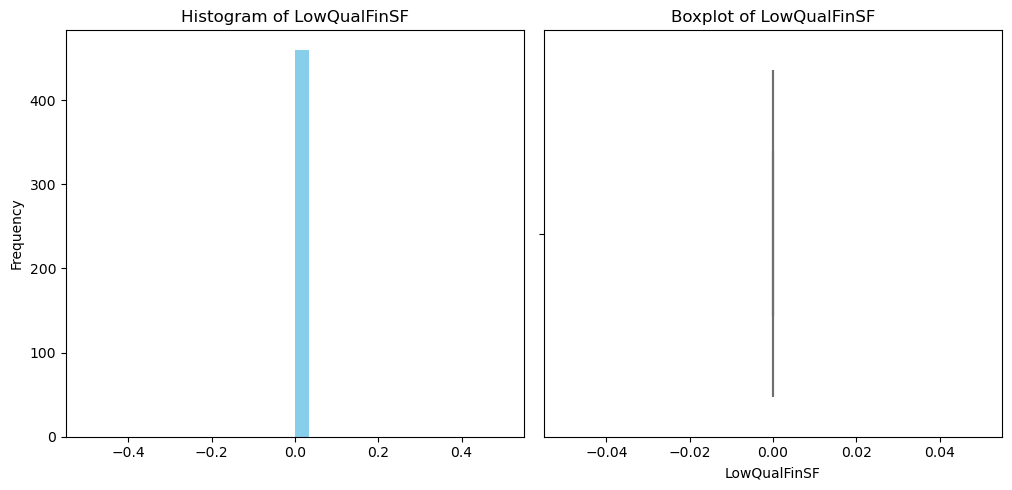

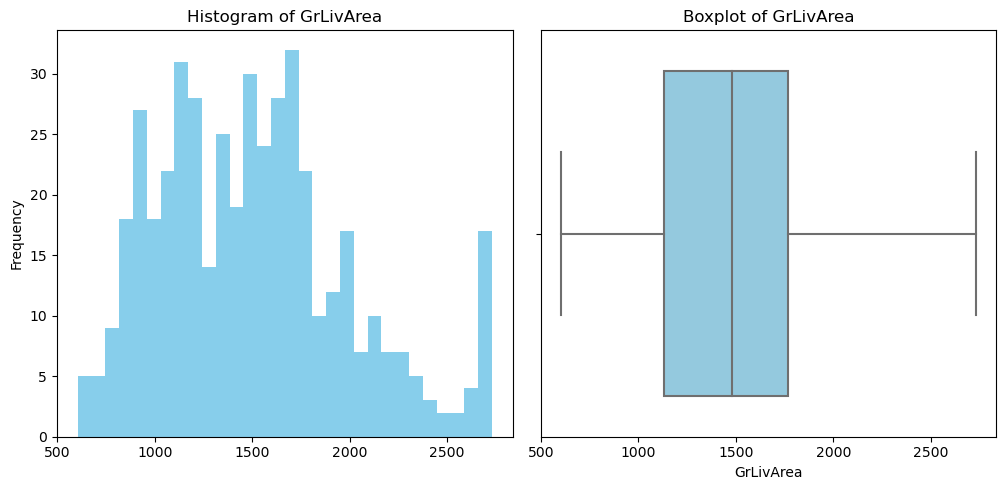

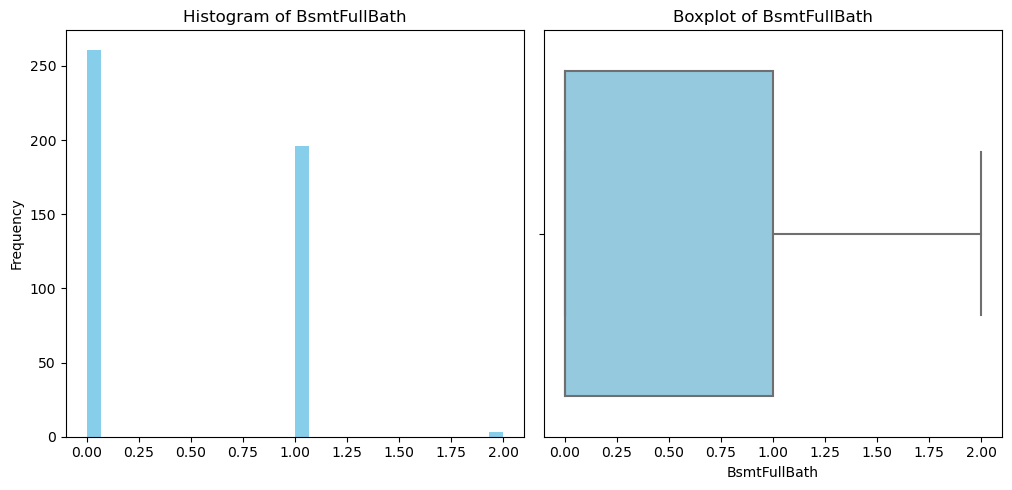

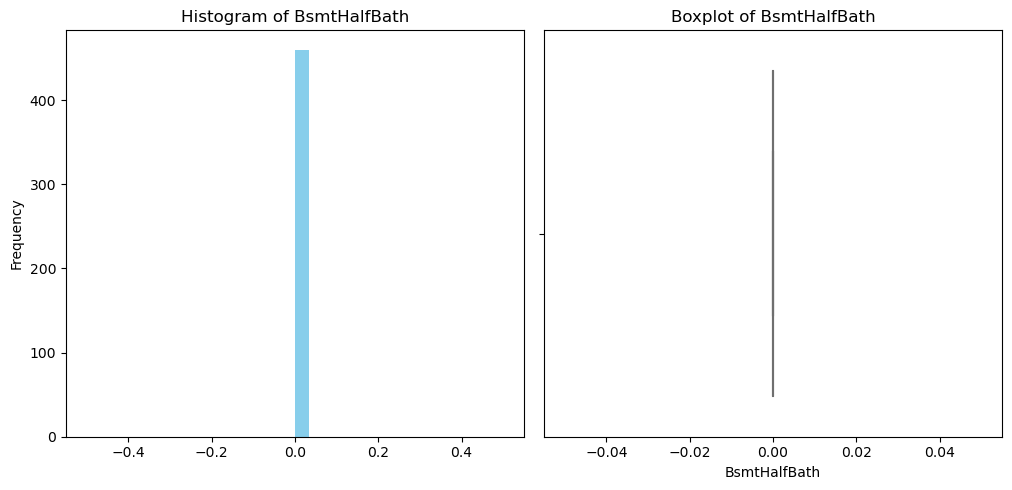

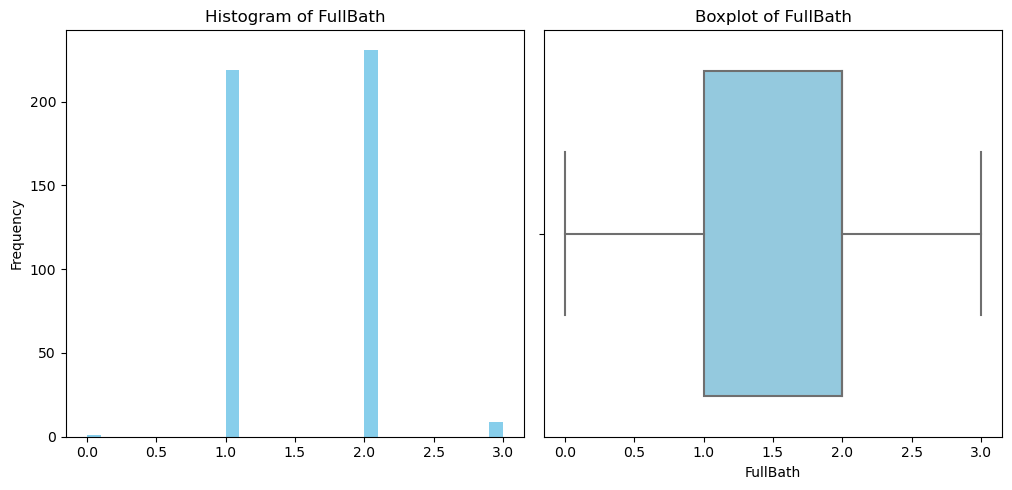

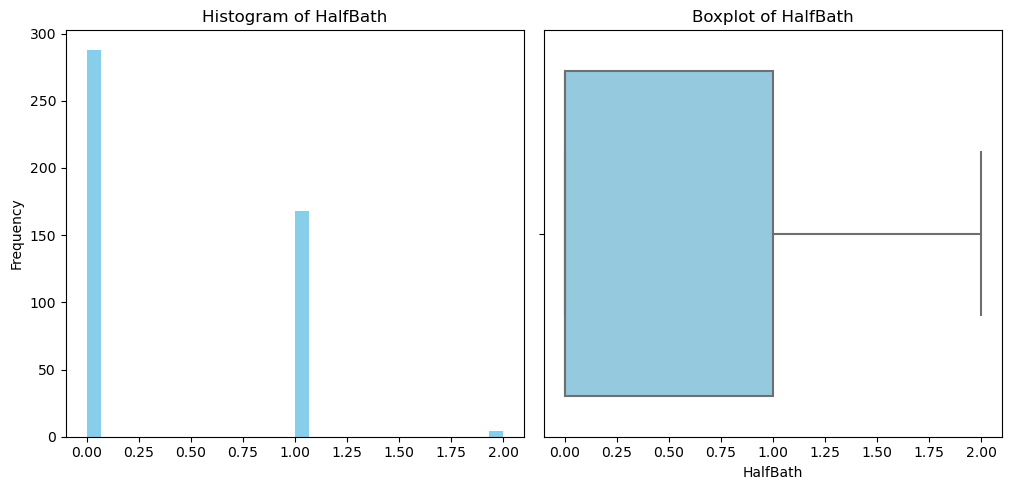

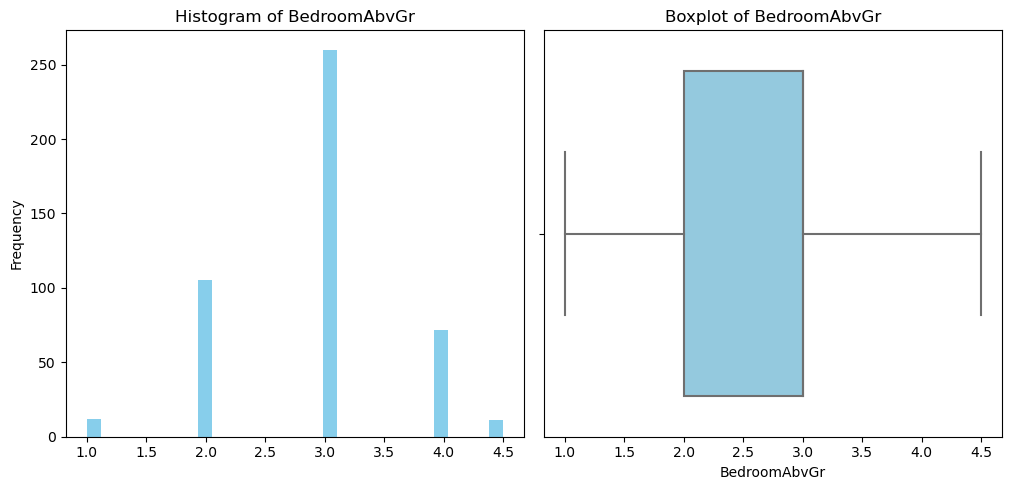

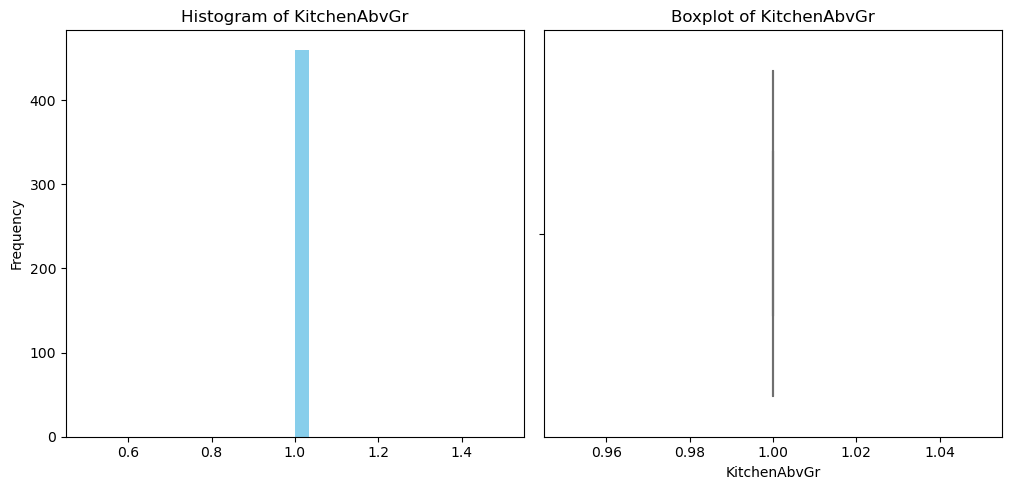

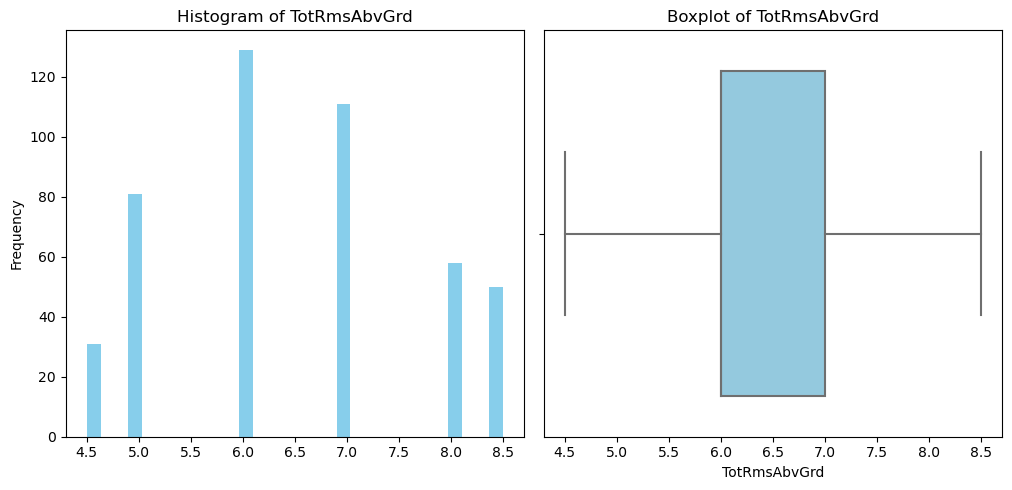

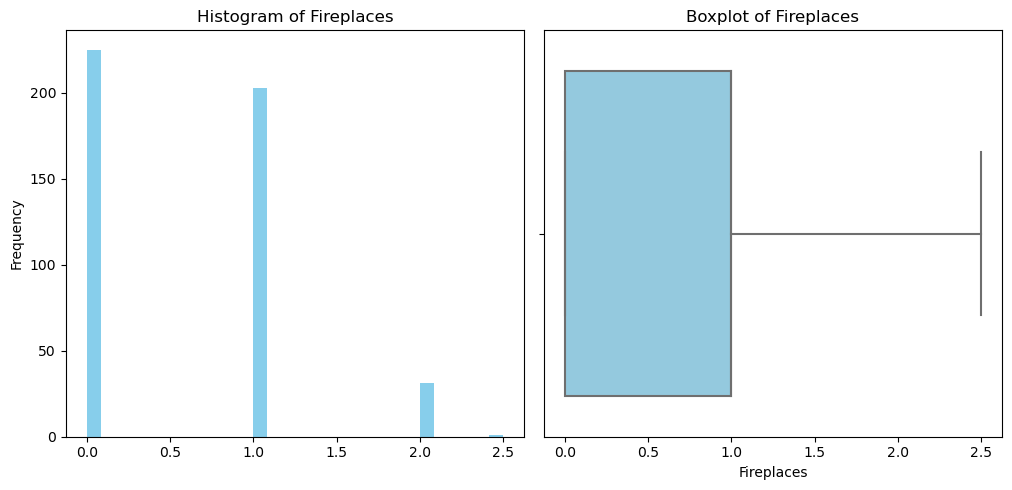

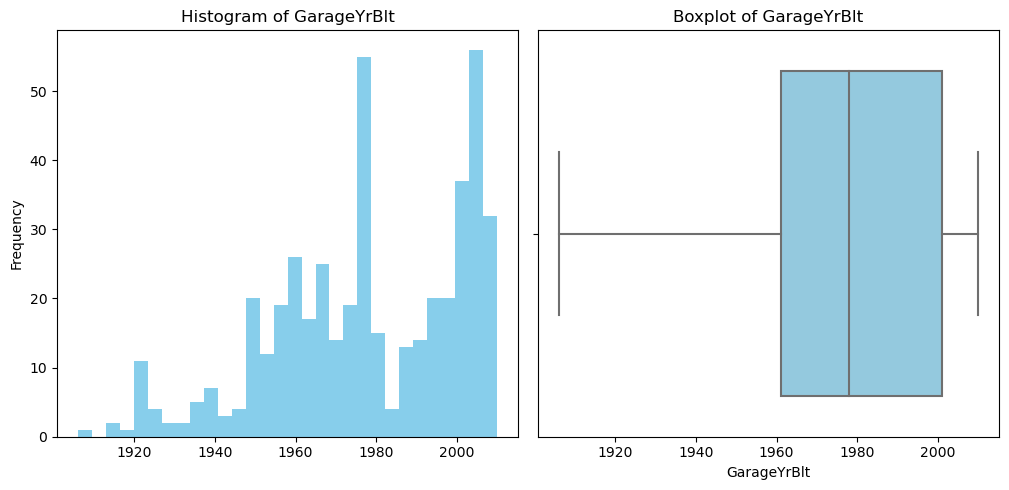

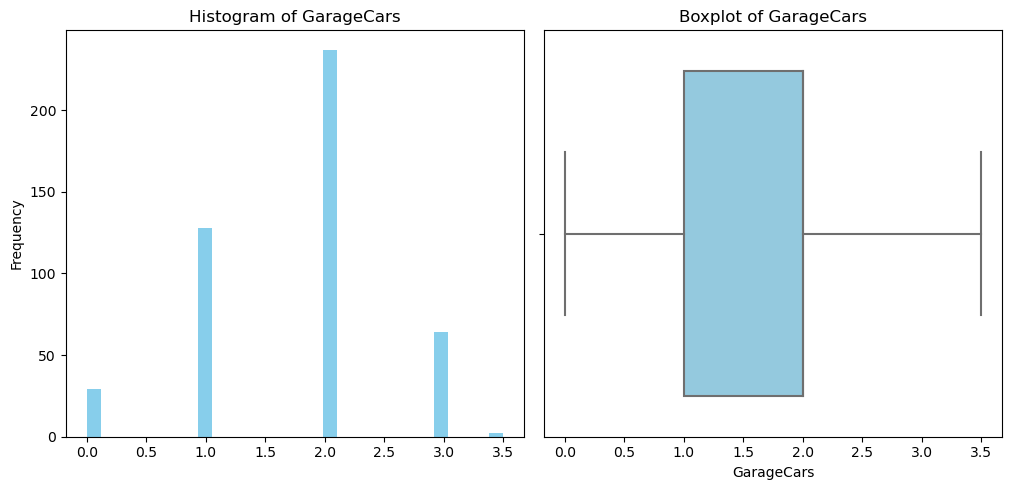

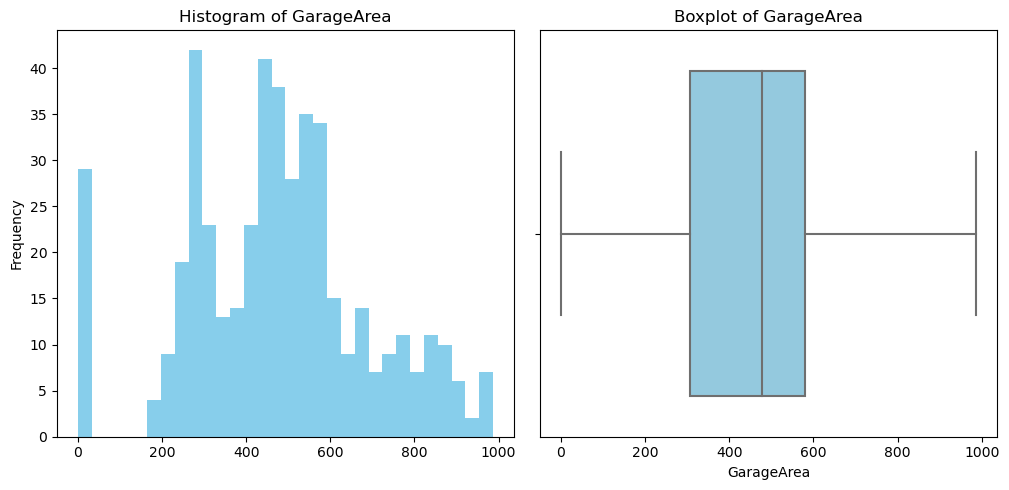

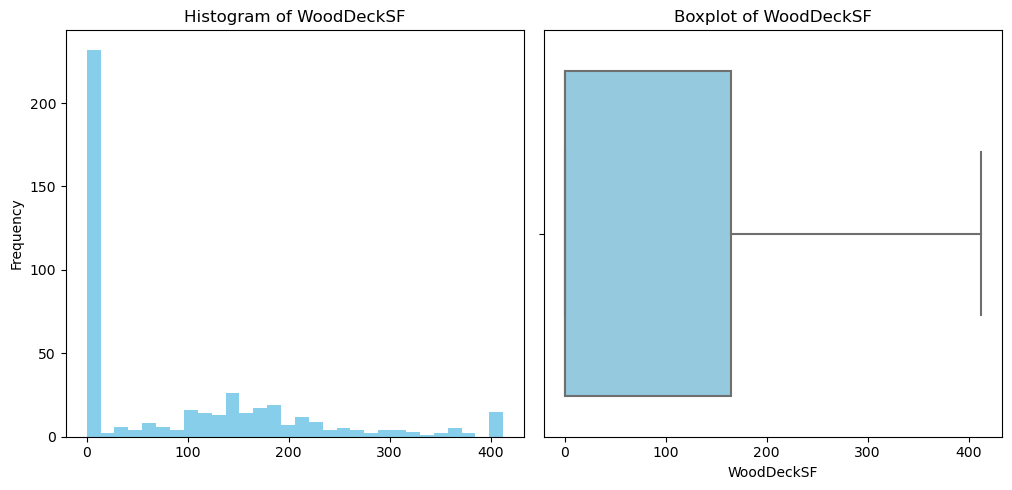

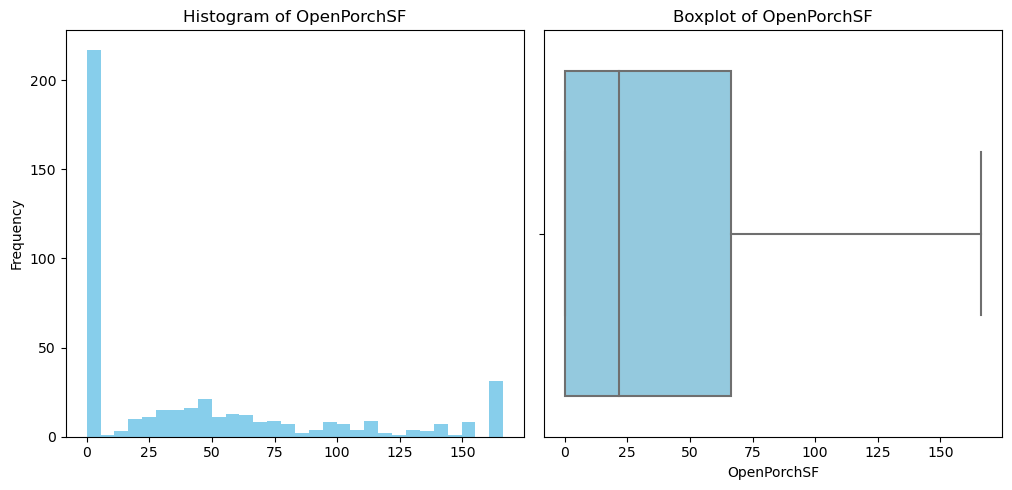

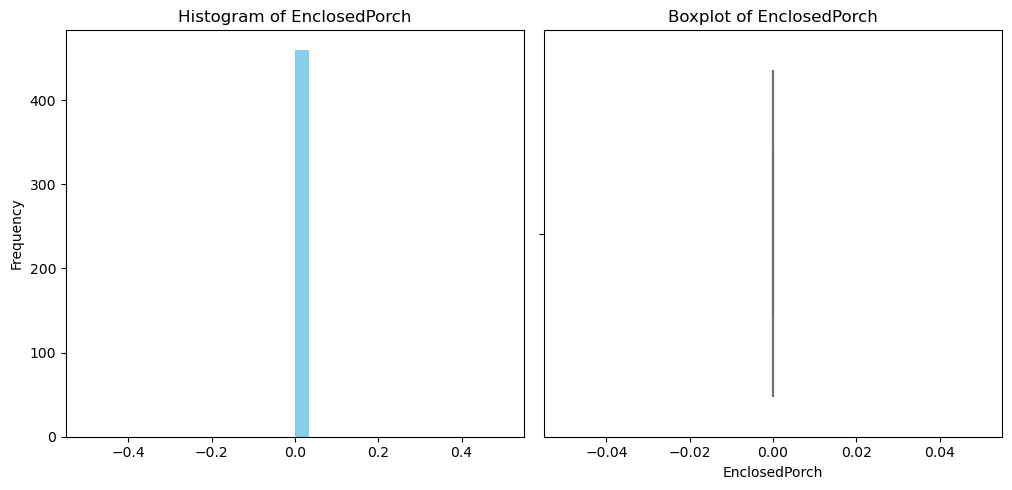

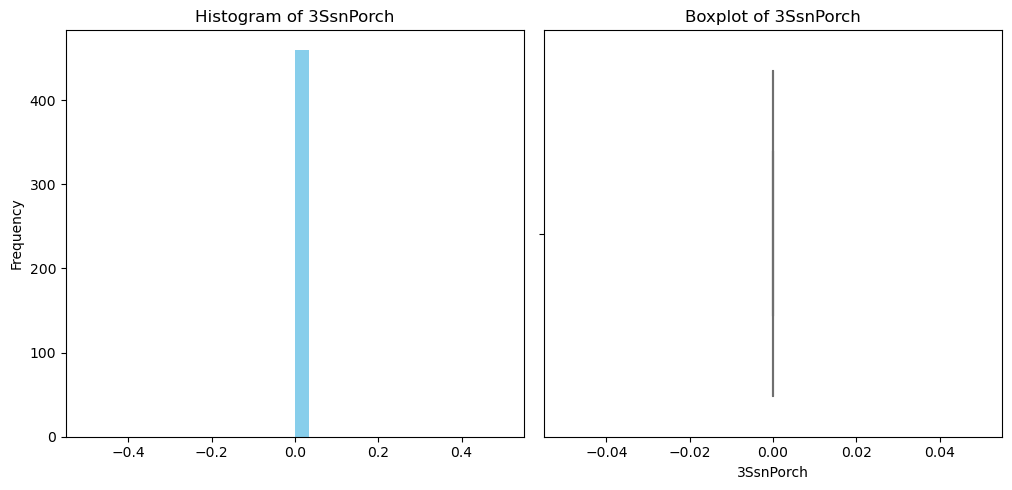

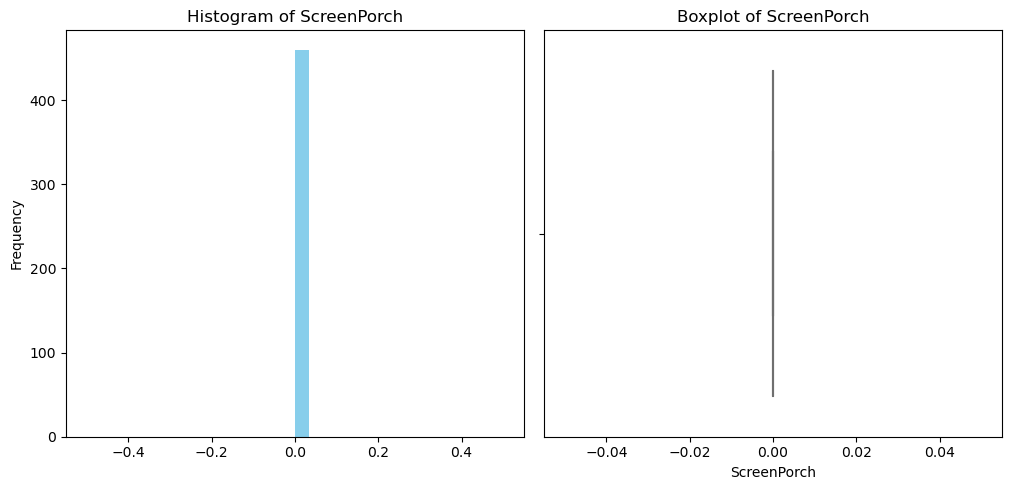

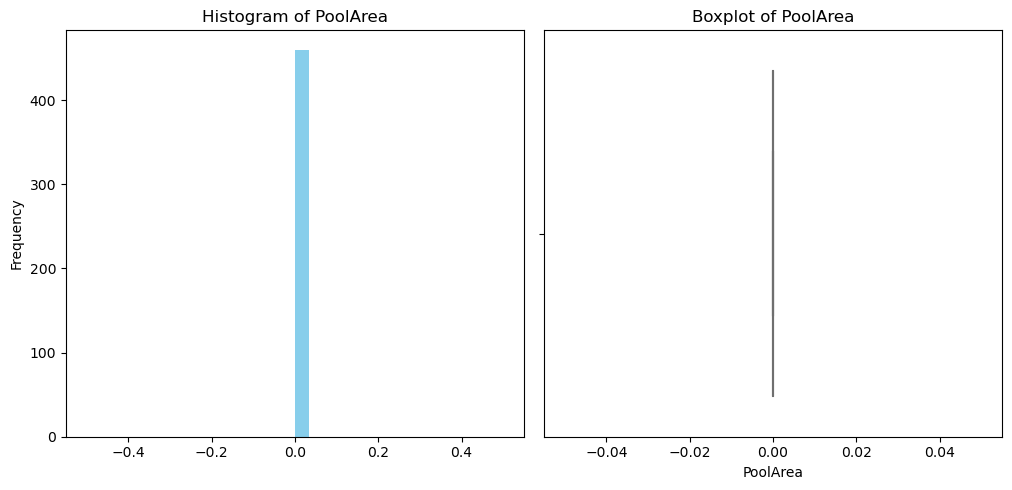

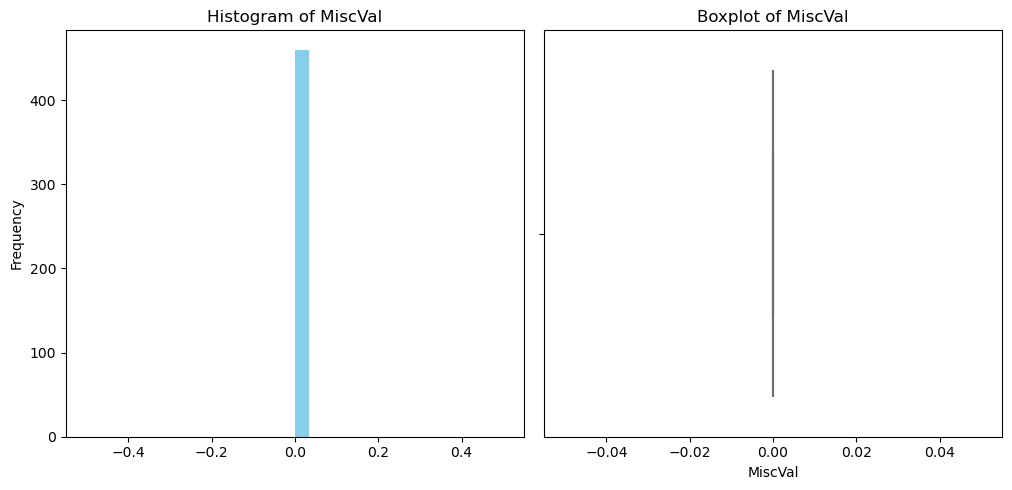

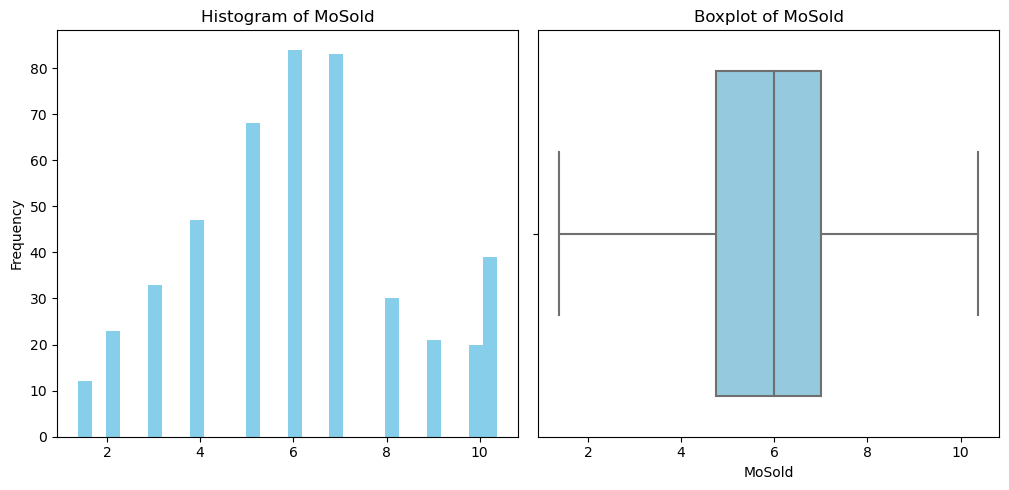

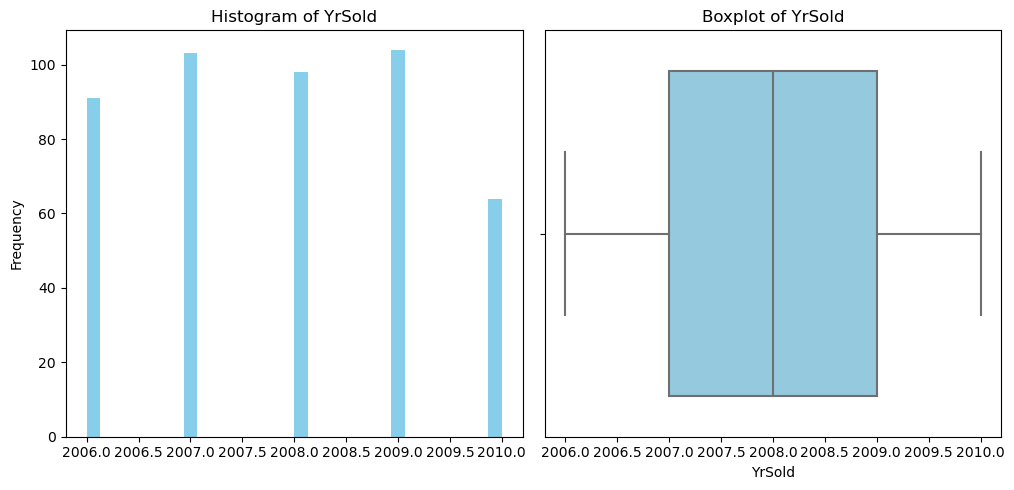

In [23]:
plot_detect_outliers (numerical_columns)

In [24]:
print("Train data:")
calculate_outliers_percentage(X)
print("Test data:")
calculate_outliers_percentage(test)

Train data:
Percentage of outliers in Id: 0.00%
Percentage of outliers in MSSubClass: 0.00%
Percentage of outliers in LotFrontage: 0.00%
Percentage of outliers in LotArea: 0.00%
Percentage of outliers in OverallQual: 0.00%
Percentage of outliers in OverallCond: 0.00%
Percentage of outliers in YearBuilt: 0.00%
Percentage of outliers in YearRemodAdd: 0.00%
Percentage of outliers in MasVnrArea: 0.00%
Percentage of outliers in BsmtFinSF1: 0.00%
Percentage of outliers in BsmtFinSF2: 0.00%
Percentage of outliers in BsmtUnfSF: 0.00%
Percentage of outliers in TotalBsmtSF: 0.00%
Percentage of outliers in 1stFlrSF: 0.00%
Percentage of outliers in 2ndFlrSF: 0.00%
Percentage of outliers in LowQualFinSF: 0.00%
Percentage of outliers in GrLivArea: 0.00%
Percentage of outliers in BsmtFullBath: 0.00%
Percentage of outliers in BsmtHalfBath: 0.00%
Percentage of outliers in FullBath: 0.00%
Percentage of outliers in HalfBath: 0.00%
Percentage of outliers in BedroomAbvGr: 0.00%
Percentage of outliers in Ki

### <p style="background-color: #EDE7F6; color: #6600ff;margin:0; display:inline-block;padding:.6rem;border-radius:.25rem;">C5.Encoding Categorical</p>

In [25]:
categorical_columns = X.select_dtypes(include=['category', 'object']).columns
categorical_columns

Index(['Neighborhood', 'Condition1', 'HouseStyle', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'BsmtFinType1', 'BsmtFinType2',
       'Functional', 'GarageType', 'SaleType', 'SaleCondition'],
      dtype='object')

In [26]:
from sklearn.preprocessing import OrdinalEncoder

encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)

X[categorical_columns] = encoder.fit_transform(X[categorical_columns].astype(str))
test[categorical_columns] = encoder.fit_transform(test[categorical_columns].astype(str))

In [27]:
X.head(3)

Id  MSSubClass  LotFrontage    LotArea  Neighborhood  Condition1  \
961  962          60         70.0  12227.000          14.0         4.0   
544  545          60         58.0  17020.125           8.0         2.0   
279  280          60         83.0  10005.000           4.0         2.0   

     HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd  RoofStyle  \
961         5.0            6          7.0     1977.0          1995        1.0   
544         5.0            7          5.0     2006.0          2006        1.0   
279         5.0            7          5.0     1977.0          1977        3.0   

     RoofMatl  Exterior1st  Exterior2nd  MasVnrArea  BsmtFinType1  BsmtFinSF1  \
961       1.0          5.0          6.0      396.25           0.0       896.0   
544       1.0          9.0         13.0        0.00           2.0       554.0   
279       1.0          7.0         10.0      299.00           1.0       392.0   

     BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  2ndFlrSF  \
961           5.0           0      434.0       1330.0      1542    1330.0   
544           5.0           0      100.0        654.0       664     832.0   
279           5.0           0      768.0       1160.0      1156     866.0   

     LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  \
961             0   2730.375             1             0         2         1   
544             0   1496.000             1             0         2         1   
279             0   2022.000             0             0         2         1   

     BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Functional  Fireplaces  \
961           4.0             1           8.5         5.0         1.0   
544           3.0             1           7.0         5.0         1.0   
279           4.0             1           8.0         5.0         1.0   

     GarageType  GarageYrBlt  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  \
961         1.0       1977.0         2.0       619.0       412.5       166.25   
544         1.0       2006.0         2.0       426.0       100.0        24.00   
279         1.0       1977.0         2.0       505.0       288.0       117.00   

     EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  YrSold  \
961              0          0            0         0        0     7.0    2008   
544              0          0            0         0        0     9.0    2006   
279              0          0            0         0        0     3.0    2008   

     SaleType  SaleCondition  ...  ExterCond_Fa  ExterCond_Gd  ExterCond_TA  \
961       8.0            4.0  ...         False          True         False   
544       6.0            5.0  ...         False         False          True   
279       8.0            4.0  ...         False         False          True   

     Foundation_BrkTil  Foundation_CBlock  Foundation_PConc  Foundation_Slab  \
961              False               True             False            False   
544              False              False              True            False   
279              False               True             False            False   

     BsmtQual_Ex  BsmtQual_Fa  BsmtQual_Gd  BsmtQual_TA  BsmtCond_Fa  \
961        False        False         True        False        False   
544        False        False         True        False        False   
279        False        False         True        False        False   

     BsmtCond_Gd  BsmtCond_Po  BsmtCond_TA  BsmtExposure_Av  BsmtExposure_Gd  \
961         True        False        False            False            False   
544         True        False        False             True            False   
279        False        False         True            False            False   

     BsmtExposure_Mn  BsmtExposure_No  Heating_Floor  Heating_GasA  \
961            False             True          False          True   
544            False            False          False          True   
279            False        

### <p style="background-color: #EDE7F6; color: #6600ff;margin:0; display:inline-block;padding:.6rem;border-radius:.25rem;">C6.Normalizing - Scaling Data (optional)</p>

In [28]:
scaler = MinMaxScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
test = pd.DataFrame(scaler.fit_transform(test), columns=test.columns)

### <p style="background-color: #EDE7F6; color: #6600ff;margin:0; display:inline-block;padding:.6rem;border-radius:.25rem;">C7.Feature Selections</p>

In [29]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 460 entries, 0 to 459
Columns: 138 entries, Id to PavedDrive_Y
dtypes: float64(138)
memory usage: 496.1 KB


In [242]:
discrete_features = X.dtypes == int


def mi_score_maker(X, y, discrete_features):
    scores = mutual_info_classif(X, y, discrete_features=discrete_features)
    df = pd.DataFrame({
        'Features': X.columns,
        'Scores': scores
    })
    df = df.sort_values(['Scores'], ascending=False).reset_index(drop=True)
    return df

In [ ]:
mi_scores = mi_score_maker(X, y, discrete_features)
mi_scores

In [423]:
a = mi_scores[mi_scores.Scores>0.01].set_index('Features')

In [426]:
a.T.columns

Index(['BldgType_Duplex', 'KitchenQual_Fa', 'BsmtExposure_Av', 'PavedDrive_P',
       'BldgType_2fmCon', 'LandContour_Bnk', 'MSZoning_RH', 'ExterCond_Gd',
       'PoolArea', 'BsmtCond_Gd', 'BsmtFinSF2', 'GarageCond_Fa',
       'GarageQual_Ex', 'GarageCond_Gd', 'GarageCond_Ex', 'GarageQual_Po',
       'MSZoning_FV', 'Electrical_FuseF', 'BsmtQual_Fa', 'LotConfig_FR2',
       'LotConfig_FR3', 'MSZoning_C (all)', 'LandSlope_Mod', 'LandSlope_Sev',
       'ScreenPorch', 'ExterCond_Fa', 'ExterCond_Po', '3SsnPorch',
       'EnclosedPorch', 'Electrical_FuseA', 'BsmtCond_Fa', 'BsmtCond_Po',
       'LotShape_IR2', 'BsmtExposure_Gd', 'BsmtExposure_Mn',
       'LotConfig_CulDSac', 'KitchenAbvGr', 'BsmtHalfBath', 'LowQualFinSF',
       'LotConfig_Corner'],
      dtype='object', name='Features')

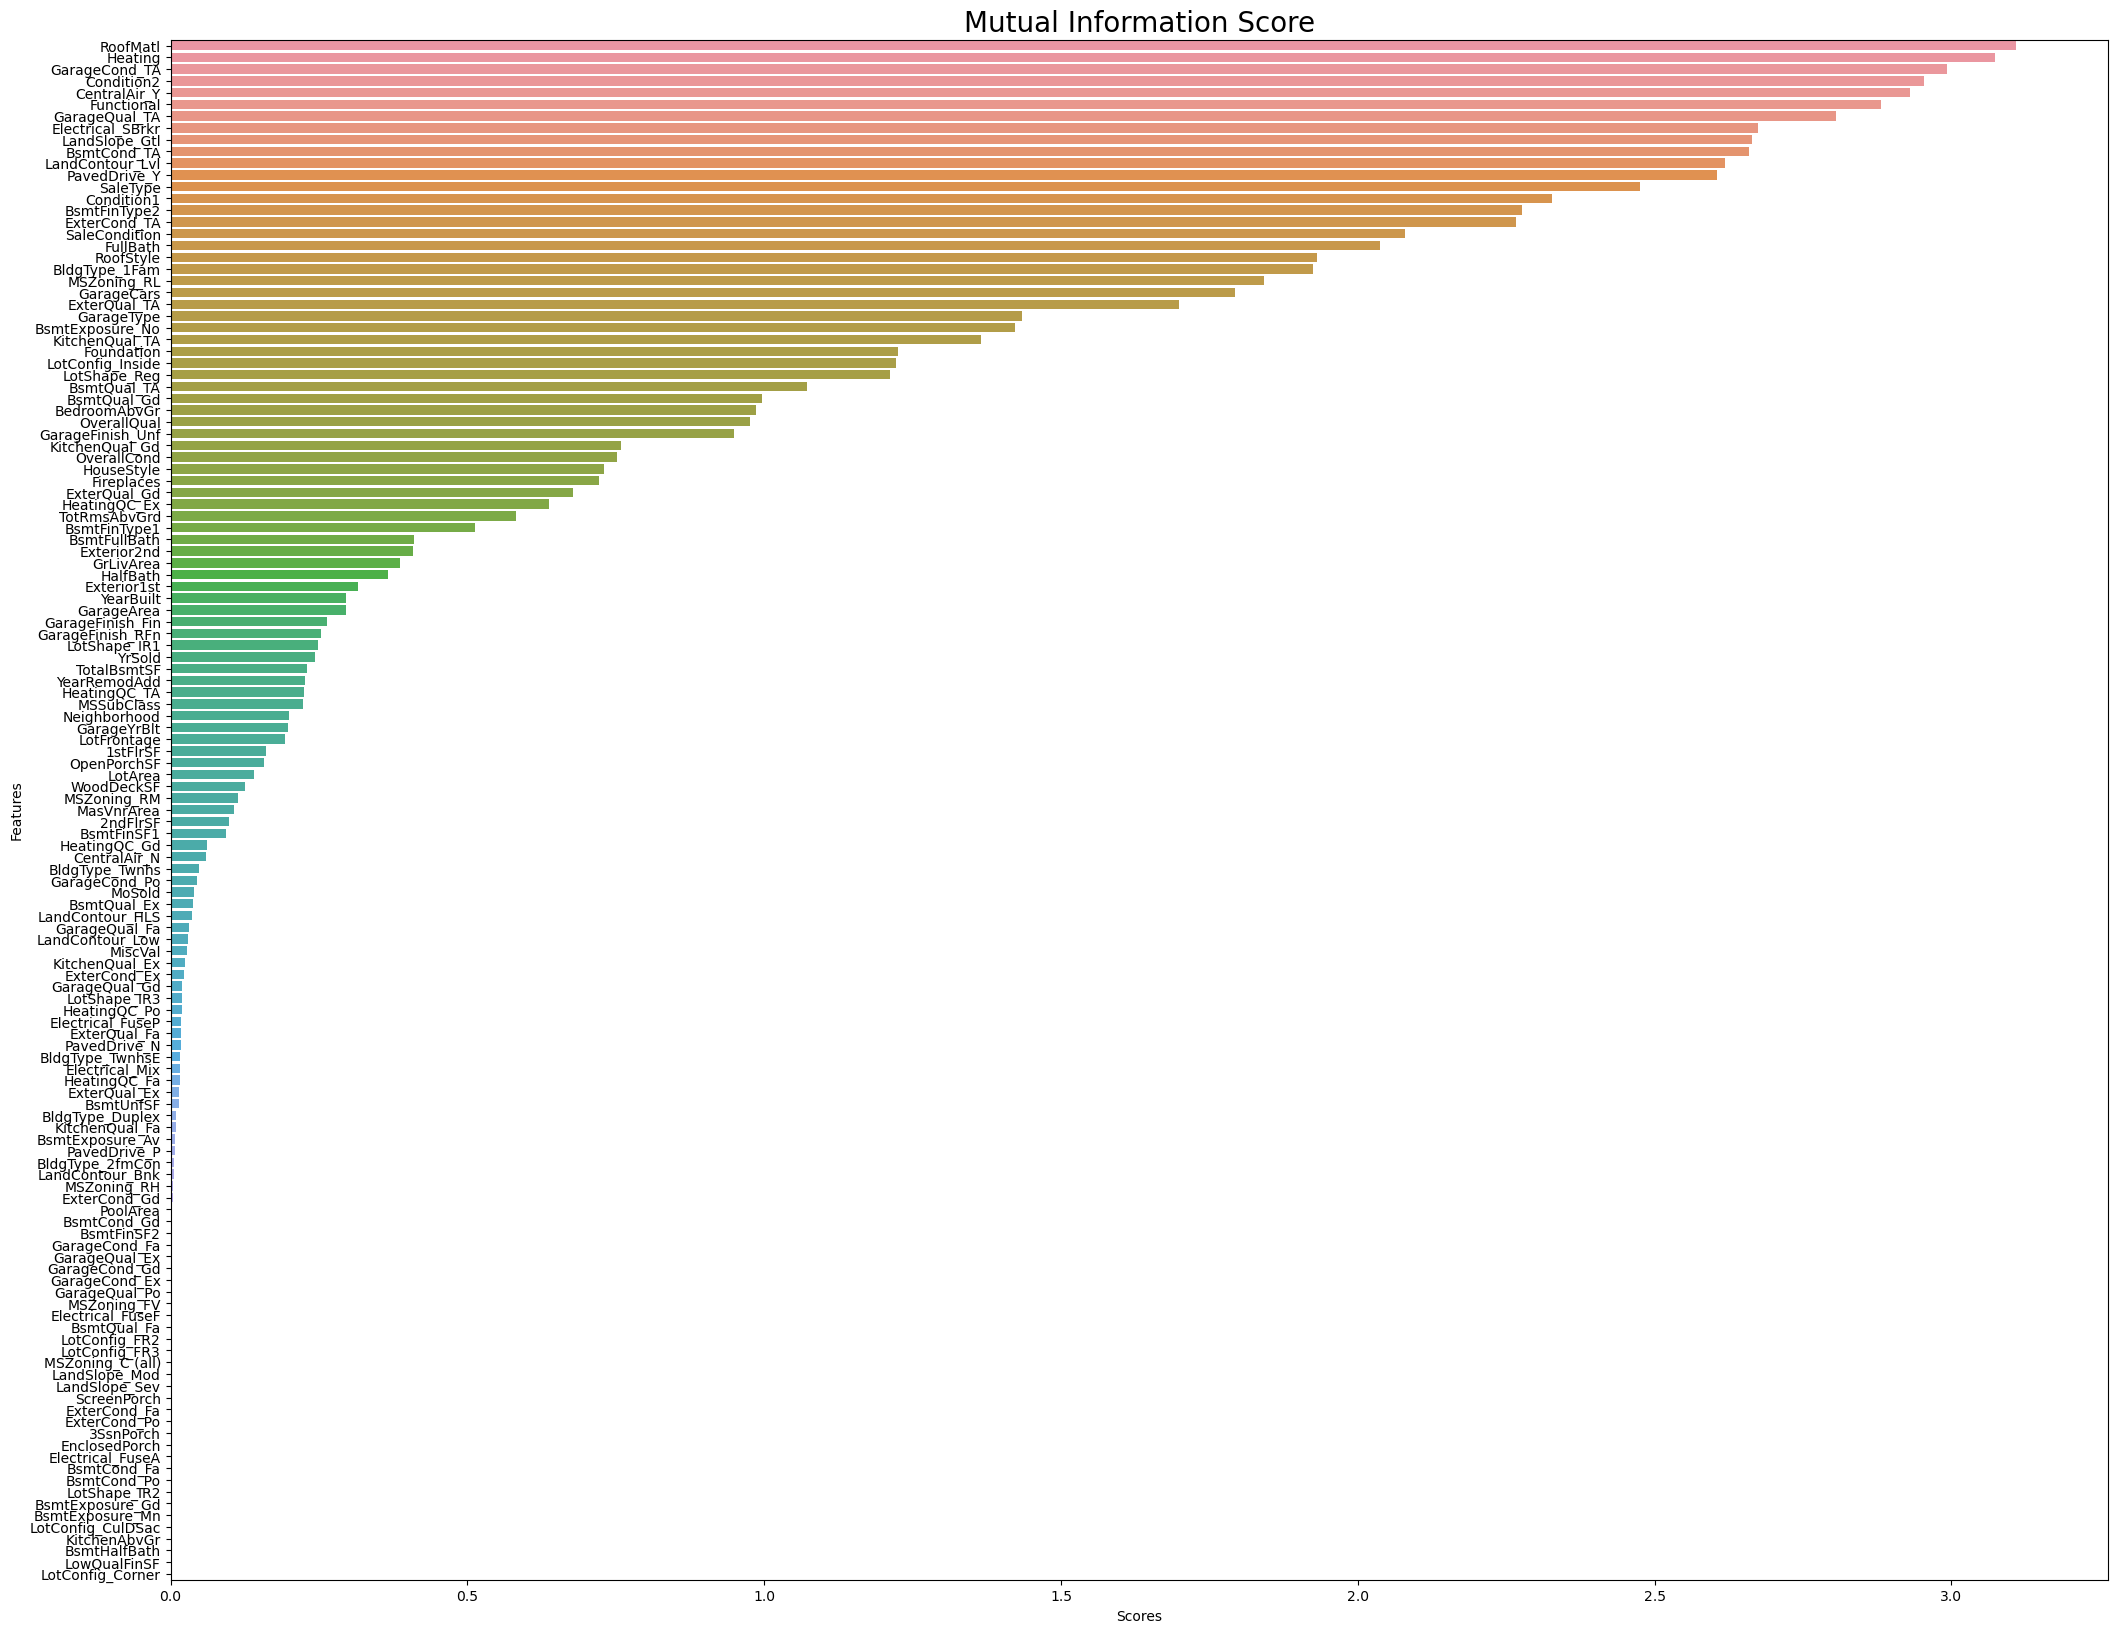

In [246]:
plt.figure(figsize=(25, 20))
sns.barplot(x="Scores", y="Features", data=mi_scores)
plt.title("Mutual Information Score", size=20)
plt.show()

### <p style="background-color: #EDE7F6; color: #6600ff;margin:0; display:inline-block;padding:.6rem;border-radius:.25rem;">C8.Delete unnecessary columns</p>

In [ ]:
# X = X.drop(["PassengerId", "Ticket"], axis=1).copy()
# test = test.drop(["PassengerId", "Ticket"], axis=1).copy()

# <p style="background-color: #EDE7F6; color: #6600ff;margin:0; display:inline-block;padding:.6rem;border-radius:.25rem;">II.MODEL ENGINEERING</p>

 ### <p style="background-color: #EDE7F6;color:#6600ff;display: inline-block;padding:.6rem;border-radius:.5rem">Import libraries</p>

In [45]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV, StratifiedKFold,KFold,RepeatedStratifiedKFold,RepeatedKFold

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder, OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer


from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, RandomForestRegressor
from xgboost import XGBRegressor,XGBClassifier
from sklearn.linear_model import LinearRegression, LogisticRegression


from sklearn.metrics import mean_squared_error, mean_absolute_error, accuracy_score, r2_score
import optuna

## <p style="background-color: #EDE7F6; color: #6600ff;margin:0; display:inline-block;padding:.6rem;border-radius:.25rem;">A.Model Training</p>

In [31]:
# splitting the training dataframe into x(features) and y (target)
X_train, X_valid, y_train, y_valid = train_test_split(X,y, train_size = 0.8, random_state=42)

In [32]:
# Define preprocessing steps
categorical_cols = [cname for cname in X_train.columns if X_train[cname].nunique() < 10 and 
                        X_train[cname].dtype == "object"]

# Select numerical columns
numerical_cols = [cname for cname in X_train.columns if X_train[cname].dtype in ['int8','int16','int32','int64','float32','float64']]

categorical_cols_2 = [cname for cname in X_train.columns if X_train[cname].nunique() >= 10 and 
                        X_train[cname].dtype == "object"]


# Preprocessing pipelines
# zastępowanie pustych wartości dla numerycznych kolumn + StandardScaler, czyli nadanie nowych wartosci w przedziale
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
#     ('scaler', StandardScaler())
])
# zastępowanie pustych wartości dla object kolumn + OneHotEncoder, czyli zamiana object na inty
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])
categorical_transformer_2 = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('odi', OrdinalEncoder())
#     (('odi', (OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value = None))))
])
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols),
        ('cat_2', categorical_transformer_2, categorical_cols_2)
    ])

### <p style="background-color: #EDE7F6; color: #6600ff;margin:0; display:inline-block;padding:.6rem;border-radius:.25rem;">A1.RandomForestRegressor</p>

In [70]:
model_1 = RandomForestRegressor(n_estimators=100, random_state=42, oob_score=True)

In [71]:
# Bundle preprocessing and modeling code in a pipeline
my_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('model', model_1)
                              ])

my_pipeline.fit(X_train, y_train)
predictions_1 = my_pipeline.predict(X_valid)

In [58]:
# Multiply by -1 since sklearn calculates *negative* MAE
scores = -1 * cross_val_score(my_pipeline, X_train, y_train,
#                               cv=skf,
                              cv=5,
                              scoring='neg_mean_absolute_error')

print("MAE scores:\n", scores)
print("Average MAE score (across experiments):")
print(scores.mean())

MAE scores:
 [19419.0327027  21483.46527027 21349.40945946 20572.83575342
 16813.66356164]
Average MAE score (across experiments):
19927.681349500188


In [64]:
skf = RepeatedStratifiedKFold(n_splits=5,
                              n_repeats=1, 
                              random_state=42)

In [67]:
cv_scores = cross_val_score(my_pipeline, X, y, 
                            cv=skf,
                            scoring='accuracy')

print("Accuracy scores:\n", scores)
print("Cross-validation accuracy: %f" % cv_scores.mean())

Accuracy scores:
 [19419.0327027  21483.46527027 21349.40945946 20572.83575342
 16813.66356164]
Cross-validation accuracy: nan


In [68]:
cv_scores

array([nan, nan, nan, nan, nan])

In [72]:
from sklearn.metrics import roc_auc_score
roc = roc_auc_score(y_valid, predictions_1)
print(roc)

ValueError: multi_class must be in ('ovo', 'ovr')

In [79]:
kf = KFold(shuffle=True, n_splits=5)

cv_results_kfold = cross_val_score(my_pipeline, X, y, cv=kf, scoring='accuracy')

print(cv_results_kfold)



[nan nan nan nan nan]


In [78]:
# Stratified K fold

skf = StratifiedKFold(shuffle=True, n_splits=5)

cv_results_skfold = cross_val_score(my_pipeline, X, y, cv=skf, scoring='accuracy')

print(cv_results_skfold)

[nan nan nan nan nan]


### <p style="background-color: #EDE7F6; color: #6600ff;margin:0; display:inline-block;padding:.6rem;border-radius:.25rem;">A1.XGBRegressor</p>

In [376]:
model_1 = XGBRegressor(random_state=42)
model_1.fit(X_train, y_train)
predictions_1 = model_1.predict(X_valid)
print(mean_absolute_error(y_valid, predictions_1))
model_1.score(X_train,y_train)

15628.012478298611


0.9998795345644704

In [377]:
model_1.score(X_valid,y_valid)

0.7845315373326004

## <p style="background-color: #EDE7F6; color: #6600ff;margin:0; display:inline-block;padding:.6rem;border-radius:.25rem;">B.Model Evaluation</p>

In [43]:
def Evaluating_the_model (model, predictions, X_train=X_train,y_train=y_train,X_valid=X_valid, y_valid=y_valid):
    print(f'Train Score:{model.score(X_train, y_train)}')
    print(f'Valid Score:{model.score(X_valid, y_valid)}')
    print(f'R-squared: {r2_score(y_valid, predictions)}')

    print(f'Mean Absolute Error: {mean_absolute_error(y_valid, predictions)}')
    print(f'Mean Squared Error: {mean_squared_error(y_valid, predictions)}')   

### <p style="background-color: #EDE7F6; color: #6600ff;margin:0; display:inline-block;padding:.6rem;border-radius:.25rem;">B1.RandomForestRegressor</p>

In [57]:
Evaluating_the_model(model_1, predictions_1)

Train Score:0.9773312383626128
Valid Score:0.6625389262104149
R-squared: 0.6625389262104149
Mean Absolute Error: 19641.157608695652
Mean Squared Error: 1581878543.5415735


### <p style="background-color: #EDE7F6; color: #6600ff;margin:0; display:inline-block;padding:.6rem;border-radius:.25rem;">B2.XGBRegressor</p>

In [ ]:
Evaluating_the_model(model_2, predictions_2)

## <p style="background-color: #EDE7F6; color: #6600ff;margin:0; display:inline-block;padding:.6rem;border-radius:.25rem;">C.Model Tuning</p>

# <p style="background-color: #EDE7F6; color: #6600ff;margin:0; display:inline-block;padding:.6rem;border-radius:.25rem;">III.MODEL DEPLOYMENT</p>

In [92]:
from lightgbm import LGBMClassifier
model_lgbm = LGBMClassifier(random_state=42)
# model_lgbm_2 = LGBMClassifier(objective='binary', boosting_type='gbdt',force_col_wise=True,metric='auc',num_leaves=51,n_estimators=250,learning_rate=0.5, random_state=42)
model_lgbm_2 = LGBMClassifier(boosting_type='gbdt',force_col_wise=True,n_estimators=250,learning_rate=0.5, random_state=42)

In [93]:
my_pipeline_2 = Pipeline(steps=[
    ('preprocessor', preprocessor),
#     ('classifier', LGBMClassifier(objective='binary', boosting_type='gbdt',force_col_wise=True,metric='auc',num_leaves=51,n_estimators=250,learning_rate=0.5))
    ('model', model_lgbm_2)
])

In [94]:
# Preprocessing of training data, fit model 
my_pipeline_2.fit(X_train, y_train)

# Preprocessing of validation data, get predictions
prediction = my_pipeline_2.predict(X_valid)

# Evaluate the model
score = mean_absolute_error(y_valid, prediction)
print('MAE:', score)

[LightGBM] [Info] Total Bins 2912
[LightGBM] [Info] Number of data points in the train set: 1168, number of used features: 59
[LightGBM] [Info] Start training from score -7.063048
[LightGBM] [Info] Start training from score -7.063048
[LightGBM] [Info] Start training from score -7.063048
[LightGBM] [Info] Start training from score -7.063048
[LightGBM] [Info] Start training from score -7.063048
[LightGBM] [Info] Start training from score -6.369901
[LightGBM] [Info] Start training from score -7.063048
[LightGBM] [Info] Start training from score -6.369901
[LightGBM] [Info] Start training from score -7.063048
[LightGBM] [Info] Start training from score -7.063048
[LightGBM] [Info] Start training from score -7.063048
[LightGBM] [Info] Start training from score -7.063048
[LightGBM] [Info] Start training from score -7.063048
[LightGBM] [Info] Start training from score -7.063048
[LightGBM] [Info] Start training from score -7.063048
[LightGBM] [Info] Start training from score -5.964436
[LightGBM]

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

In [95]:
from sklearn.metrics import mean_absolute_error
print(f'MAE: {mean_absolute_error(prediction, y_valid)}')
print(f'Train model score: {my_pipeline_2.score(X_train, y_train)}')
print(f'Valid model score: {my_pipeline_2.score(X_valid, y_valid)}')

MAE: 48622.42123287671
Train model score: 0.02226027397260274
Valid model score: 0.010273972602739725


# CatBoostRegressor

In [143]:
from catboost import CatBoostRegressor
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=519)

ModuleNotFoundError: No module named 'catboost'

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
model = CatBoostRegressor(
    iterations=3000, 
    depth=6, 
    learning_rate=0.03,
    loss_function='RMSE',
    verbose=200,
)

model.fit(X_train, y_train)

In [ ]:
X_train = train.sample(frac=0.9,random_state=42)
X_val = train.drop(split_train.index)

y_train = X_train.pop(pred_label)
y_val = X_val.pop(pred_label)

X_test = test

In [97]:
from sklearn.metrics import adjusted_mutual_info_score

y_pred_train = model_xgb.predict(X_train)
train_accuracy = adjusted_mutual_info_score(y_train, y_pred_train)
print("Training Accuracy:", train_accuracy)


Training Accuracy: 0.0029053346139317217


D:\Programy\anaconda3\Lib\site-packages\sklearn\metrics\cluster\_supervised.py:66: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)


In [98]:
from sklearn.metrics import accuracy_score

y_pred_train = model_xgb.predict(X_train)
train_accuracy = accuracy_score(y_train, y_pred_train)
print("Training Accuracy:", train_accuracy)

ValueError: continuous is not supported

In [ ]:
y_pred_val = model_xgb.predict(X_valid)
val_accuracy = accuracy_score(y_valid, y_pred_val)
print("Validation Accuracy:", val_accuracy)

In [59]:
from math import sqrt

In [60]:
test_predictions = model_xgb.predict(X_test)
test_predictions =np.exp(test_predictions)


submission = pd.DataFrame({
    "Id": range(1461, 1461 + len(test_predictions)),
    "SalePrice": test_predictions
})

submission.to_csv("submission.csv", index=False)

In [92]:
test_predictions = model_xgb.predict(X_test)

submission = pd.DataFrame({
    "Id": range(1461, 1461 + len(test_predictions)),
    "SalePrice": test_predictions
})

submission.to_csv("submission.csv", index=False)